# This version use hierarchical clustering only to extract MRs. Once the MRs are extracted, distance between them and the training data will be calculated to extract features.

In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:75% !important; }</style>"))

import csv
from datetime import datetime
from datetime import timedelta
#from struct import pack
import os
import gc
from numpy import abs, max 
import scipy
#from scipy import io
import numpy as np
from matplotlib import pyplot as plt
#from scipy.signal import butter, lfilter
from scipy import signal
#from scipy.signal import blackman
#from scipy.signal import periodogram
#import gc
#import os
import sys
import pandas as pd
#from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.spatial import distance

gc.enable()

video_start = '20190501'#'20190327'#'20181220' #YYYYMMDD
video_end = '20190501'#'20190327'#'20181220' #YYYYMMDD
data_path = '/data/'
sensor_list = ["acc_w","wifi"]#["gyro","acc2","acc_w","wifi","magnetic"]

temp_video_start = video_start[0:4] + "/" + video_start[4:6] + "/" +video_start[6:8]
temp_video_end = video_end[0:4] + "/" + video_end[4:6] + "/" +video_end[6:8]
print temp_video_start
print temp_video_end

video_startdatte = datetime.strptime(temp_video_start,'%Y/%m/%d')
video_enddate = datetime.strptime(temp_video_end,'%Y/%m/%d')

2019/05/01
2019/05/01


In [2]:
root = "env/"

envs = os.listdir(root)
envs = envs[0:len(envs)-1]
envs = [int(x) for x in envs]
envs.sort()

In [3]:
print "Please select a testing environment from the following environments list:"

for i in envs:
    print "Environment: (",i,")"
    
test_env = raw_input("Testing environment ")

test_env = int(test_env)

Please select a testing environment from the following environments list:
Environment: ( 5 )
Environment: ( 6 )
Environment: ( 8 )
Environment: ( 9 )
Environment: ( 10 )
Testing environment 5


In [4]:
envs.remove(test_env)
train_env=envs

In [5]:
train_env

[6, 8, 9, 10]

In [124]:
train_root = root + str(test_env) + "/dat/" + "train_dat/"

In [122]:
location_list

0         1
0         1.0  3.889403
1         2.0  3.697325
2         3.0  3.399065
3         4.0  3.426182
4         5.0  3.317291
5         6.0  3.060173
6         7.0  3.304810
7         8.0  3.127418
8         9.0  3.051782
9        10.0  2.989814
10       11.0  3.000736
11       12.0  3.002801
12       13.0  3.171703
13       14.0  3.068140
14       15.0  2.928619
15       16.0  2.773923
16       17.0  2.739291
17       18.0  2.820464
18       19.0  2.786500
19       20.0  2.762202
20       21.0  2.810502
21       22.0  2.675120
22       23.0  2.858403
23       24.0  2.852674
24       25.0  2.877527
25       26.0  2.856010
26       27.0  3.072524
27       28.0  3.067331
28       29.0  2.983975
29       30.0  2.984230
...       ...       ...
19969  4971.0  7.633321
19970  4972.0  7.650408
19971  4973.0  7.409011
19972  4974.0  7.257383
19973  4975.0  8.086709
19974  4976.0  7.689932
19975  4977.0  7.096376
19976  4978.0  6.982957
19977  4979.0  7.276780
19978  4980.0  7.097748
19979  4981.0  7.400450
19980  4982.0  7.288375
19981  4983.0  7.146086
19982  4984.0  7.141436
19983  4985.0  7.485314
19984  4986.0  7.433238
19985  4987.0  7.202907
19986  4988.0  6.866378
19987  4989.0  6.858965
19988  4990.0  7.183738
19989  4991.0  7.470278
19990  4992.0  7.409782
19991  4993.0  7.474928
19992  4994.0  7.445269
19993  4995.0  7.778416
19994  4996.0  7.629545
19995  4997.0  7.772129
19996  4998.0  7.495267
19997  4999.0  7.846593
19998     0.0  6.756504

[19999 rows x 2 columns]

In [58]:
len(acc)

20003

In [60]:
location_list = location_list.append( location_list.iloc[[-1]*(len(acc)-len(location_list))])

In [61]:
location_list.index = acc.index

In [135]:
location_list = location_list.drop(location_list.columns[0], axis = 1)

In [62]:
all_mots = all_mots.drop(all_mots.columns[0], axis = 1)

In [164]:
acc = acc.drop(acc.columns[0], axis = 1)

In [165]:
acc

1
0      4.153605
1      3.889403
2      3.697325
3      3.399065
4      3.426182
5      3.317291
6      3.060173
7      3.304810
8      3.127418
9      3.051782
10     2.989814
11     3.000736
12     3.002801
13     3.171703
14     3.068140
15     2.928619
16     2.773923
17     2.739291
18     2.820464
19     2.786500
20     2.762202
21     2.810502
22     2.675120
23     2.858403
24     2.852674
25     2.877527
26     2.856010
27     3.072524
28     3.067331
29     2.983975
...         ...
19973  7.633321
19974  7.650408
19975  7.409011
19976  7.257383
19977  8.086709
19978  7.689932
19979  7.096376
19980  6.982957
19981  7.276780
19982  7.097748
19983  7.400450
19984  7.288375
19985  7.146086
19986  7.141436
19987  7.485314
19988  7.433238
19989  7.202907
19990  6.866378
19991  6.858965
19992  7.183738
19993  7.470278
19994  7.409782
19995  7.474928
19996  7.445269
19997  7.778416
19998  7.629545
19999  7.772129
20000  7.495267
20001  7.846593
20002  6.756504

[20003 rows x 1 columns]

## Euclidean distance

from sklearn.metrics.pairwise import euclidean_distances

dist_mat = euclidean_distances(all_mots,all_mots)

plt.figure(figsize=(10,10))
plt.imshow(dist_mat, cmap='jet',interpolation='nearest', origin='upper', extent=[0,len(dist_mat),0,len(dist_mat)], aspect='auto')
#plt.colorbar()

# Cosine similarity -> distance matrix

## 1

from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A_sparse = sparse.csr_matrix(all_mots.values)

similarities = cosine_similarity(A_sparse)

std_similarities = (similarities - np.mean(similarities)) / np.std(similarities)

1-pd.DataFrame(similarities).max().max()

## 2

similarity = np.dot(all_mots.values, all_mots.values.T)


# squared magnitude of preference vectors (number of occurrences)
square_mag = np.diag(similarity)

# inverse squared magnitude
inv_square_mag = 1 / square_mag

# if it doesn't occur, set it's inverse magnitude to zero (instead of inf)
inv_square_mag[np.isinf(inv_square_mag)] = 0

# inverse of the magnitude
inv_mag = np.sqrt(inv_square_mag)

# cosine similarity (elementwise multiply by inverse magnitudes)
cosine = similarity * inv_mag
cosine = cosine.T * inv_mag

pd.DataFrame(cosine).max().max()

## 3

len(all_mots)

from math import*

sim = []

def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
 
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

for x in tqdm(range(len(all_mots))):
    for y in range(len(all_mots)):
        sim.append(cosine_similarity(all_mots.values[x], all_mots.values[y]))

# DTW distance matrix

## 1

from dtw import dtw

for n in tqdm(range(len(all_mots))):
    x = all_mots.values[n]
    for m in range(len(all_mots)):
        y = all_mots.values[m]
        euclidean_norm = lambda x, y: np.abs(x - y)
        d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)

## 2

In [63]:
len(all_mots)

138

In [64]:
from cdtw import pydtw 

dist = []

for n in tqdm(range(len(all_mots))):
    di = []
    x = all_mots.values[n]
    for m in range(len(all_mots)):
        y = all_mots.values[m]
        #euclidean_norm = lambda x, y: np.abs(x - y)
        di.append(pydtw.dtw(x,y).get_dist())
        #d, cost_matrix, acc_cost_matrix, path = pydtw.dtw(x, y, dist=euclidean_norm).getdist()
    dist.append(di)

100%|██████████| 138/138 [00:03<00:00, 39.02it/s]


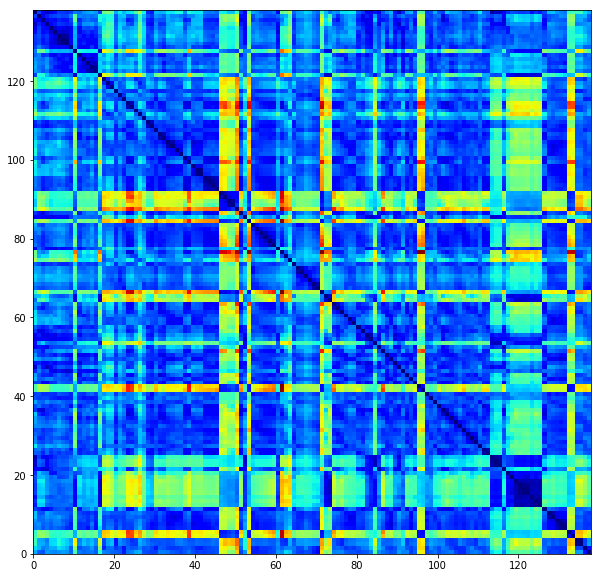

In [65]:
plt.figure(figsize=(10,10))
plt.imshow(dist, cmap='jet',interpolation='nearest', origin='upper', extent=[0,len(dist),0,len(dist)], aspect='auto')
#plt.colorbar()

In [66]:
pd.DataFrame(dist).to_csv(train_root + "mot_dist_mat", header=False, index=False)

In [67]:
dist_mat = dist

In [68]:
np.isnan(np.min(dist_mat))

False

# Hierarchical clustering

In [69]:
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

dist_array = ssd.squareform(dist_mat)#ssd.squareform(np.around(dist_mat, decimals = 5))

Z = linkage(dist_array, method='single', metric='minkowski')#,optimal_ordering=True)

plt.figure(figsize=(30,10))
dn = dendrogram(Z)
plt.show()

In [70]:
Z[:20]

array([[121.        , 122.        ,  12.86616258,   2.        ],
       [  7.        ,   8.        ,  14.57461744,   2.        ],
       [134.        , 135.        ,  17.61126725,   2.        ],
       [ 40.        ,  41.        ,  19.91752055,   2.        ],
       [  6.        , 139.        ,  21.186352  ,   3.        ],
       [120.        , 138.        ,  23.68683938,   3.        ],
       [ 42.        ,  43.        ,  30.90710628,   2.        ],
       [114.        , 115.        ,  31.5570804 ,   2.        ],
       [130.        , 131.        ,  31.88309311,   2.        ],
       [113.        , 145.        ,  48.61965438,   3.        ],
       [ 48.        ,  49.        ,  52.86033891,   2.        ],
       [123.        , 125.        ,  56.75347949,   2.        ],
       [124.        , 149.        ,  57.32967376,   3.        ],
       [ 14.        ,  15.        ,  58.55448527,   2.        ],
       [ 44.        , 144.        ,  59.08721496,   3.        ],
       [143.        , 150

In [71]:
t = 0.4*max(Z[:,2])
clusters = fcluster(Z, t, criterion="distance")

In [72]:
t

147.80405628409417

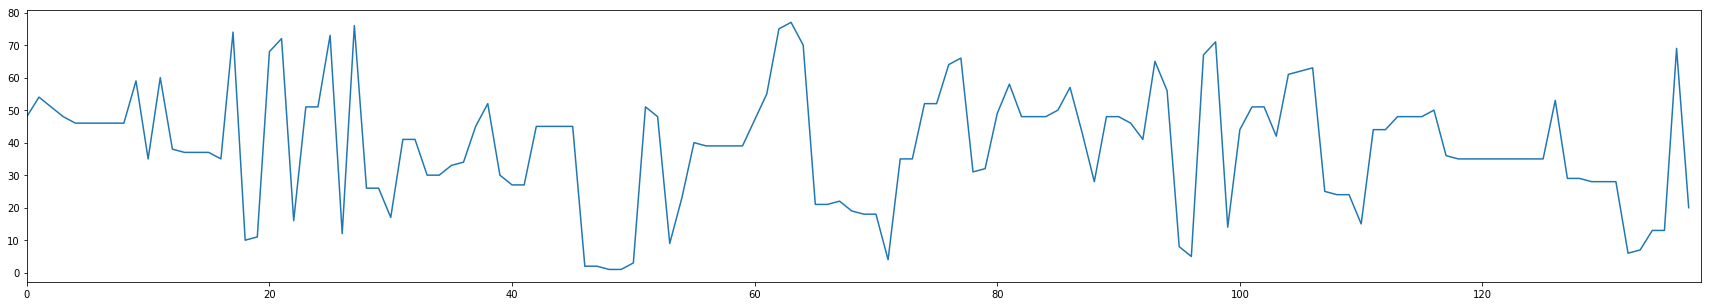

In [73]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(clusters))
plt.plot(clusters)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


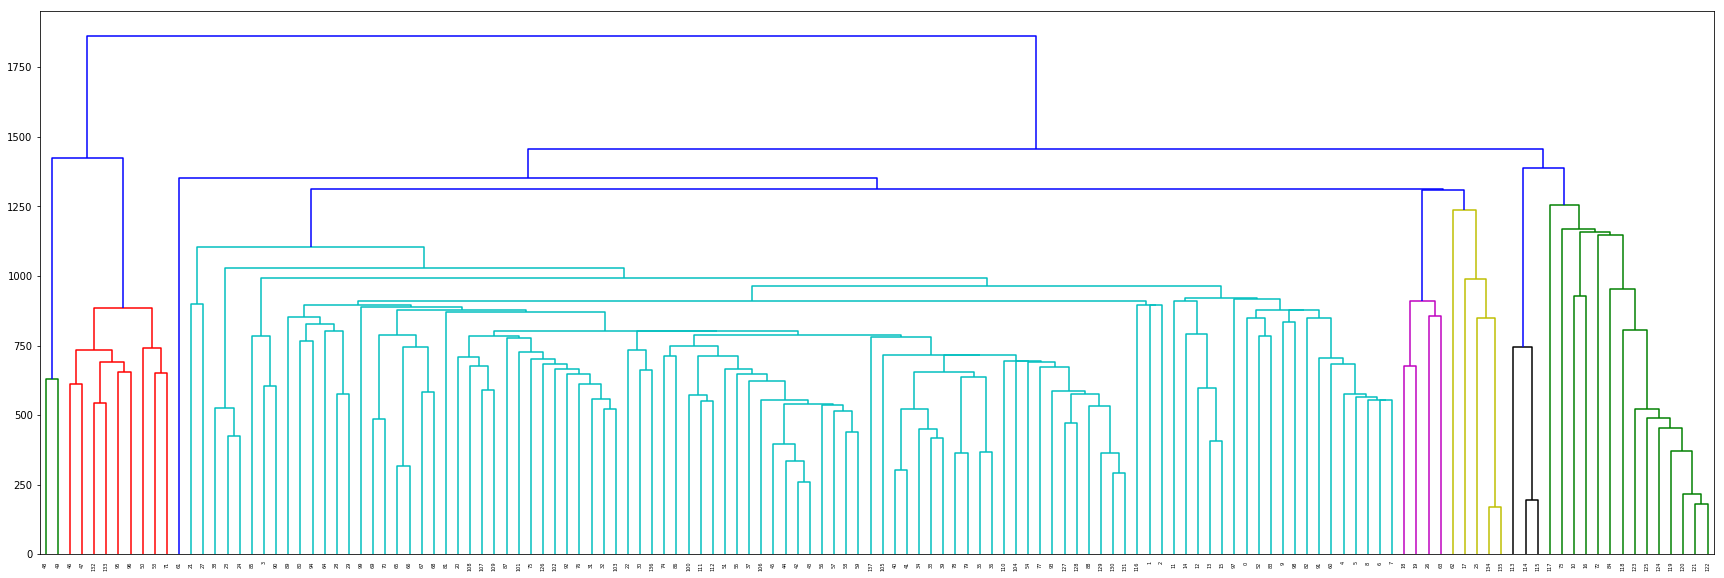

In [74]:
from scipy.cluster import hierarchy
ytdist = dist
Z = hierarchy.linkage(ytdist, 'single')
plt.figure(figsize=(30,10))
dn = hierarchy.dendrogram(Z)

In [75]:
len(clusters)

138

# Motif representative calculation

In [77]:
mot_id = pd.DataFrame(clusters,columns=["mot_id"])

In [78]:
all_mots_clusters = pd.concat([mot_id,all_mots],axis = 1,sort=False)

In [79]:
all_mots_clusters

mot_id          1          2          3          4          5          6  \
0        48   3.017716   2.606474   2.475071   2.964946   2.971992   3.217819   
1        54   4.257018   3.974360   4.144614   4.151684   4.024171   4.306880   
2        51   2.046363   1.766554   1.727282   2.308549   2.427679   2.229441   
3        48  -1.883297  -5.444855  -3.219668  -0.161607   1.525826   2.563308   
4        46   4.203134   3.817290   3.404996   2.842076   2.086360   2.170706   
5        46   2.269724   3.995979   4.829229   4.013911   1.901410   0.707410   
6        46   8.757181   9.893565  10.808433  11.341965  11.402236  11.402858   
7        46  11.296633  11.148668  11.263346  11.269059  10.923474   9.544792   
8        46  11.269059  10.923474   9.544792   8.252158   5.440895   4.584930   
9        59  -0.434276  -2.123974  -3.936418  -2.905805  -0.477002   1.441548   
10       35  12.856998  13.742845  13.204969  11.167102   8.700657   5.973151   
11       60  -1.796854  -1.794805  -1.128630  -0.275102  -0.107185  -0.311690   
12       38  -2.053170  -0.630071   0.207665   2.468551   6.374334   9.311358   
13       37  11.698536  12.345962  11.738747   9.460244   5.613498   2.987386   
14       37  12.754760  12.153813  11.947874  11.824323  12.388696  12.317354   
15       37  11.321547   7.199842   2.353301  -1.128143  -4.771049  -4.485501   
16       35   8.783038   9.282770   9.453991   8.578912   8.300720   9.040214   
17       74  -4.905303  -4.592173  -8.846618  -9.906018 -11.248800 -10.101492   
18       10  -7.616681  -6.450056  -3.301178  -0.038427   1.850688   2.928282   
19       11  -1.619213   9.191078  20.430652  16.733369   0.644303 -15.724437   
20       68  -7.683400 -12.205076 -10.580160  -4.924018  -0.191677   5.646818   
21       72  -3.664567  -3.250106  -2.888644  -2.279507  -1.780870  -1.843903   
22       16  -2.112375 -14.605554 -10.874231  -4.703917   0.634797   4.016910   
23       51  -1.546233  -0.128146   0.322585   0.886291  -1.206319  -5.493584   
24       51  -8.420119  -9.951110  -8.433066  -6.260448  -2.766924  -1.102841   
25       73   2.158680   0.863221  -1.289806  -1.313960  -1.928377  -3.760753   
26       12  -3.683846  -4.030457  -4.478419  -4.385396  -3.147025  -1.339640   
27       76  -6.430456 -16.115306 -11.014037  -0.287846   9.488765  18.109702   
28       26  15.073068  16.007182   9.699865  -1.546116  -8.032895 -13.476538   
29       26   1.055918  -1.232039  -9.590931 -12.139224  -5.496916   0.133355   
..      ...        ...        ...        ...        ...        ...        ...   
108      24   6.900610   6.080926   4.995167   4.418993   4.403029   0.819826   
109      24 -16.510863 -13.954722  -4.972276   0.195526   1.363440   4.122541   
110      15  -0.451044  -1.778374  -2.782481  -2.906443  -2.157165  -2.510860   
111      44  -3.797522  -6.237775  -7.419112  -3.186991   6.505164  12.535822   
112      44  12.535822  15.569889  12.157195   3.700766  -4.465869  -8.388250   
113      48   3.638113   6.777294   5.924790   4.722990   2.845425   2.866177   
114      48   5.327736   6.096392   6.455111   6.171074   6.763889   6.566878   
115      48   4.375935   3.625978   4.381191   4.886905   4.205726   4.376900   
116      50   4.884479   4.979053   4.945480   5.054373   4.562287   3.927812   
117      36   2.323800   2.265424   2.187688   0.725958   1.105004   5.561058   
118      35  13.279831  13.370795  13.615119  12.219650  13.845287  12.822757   
119      35   8.213418   9.017198   7.173709   6.322972   6.612972   6.777840   
120      35   6.712499   8.179621   8.643983   7.311904   7.033719   7.325702   
121      35  10.041390   9.525508   7.674482   7.375618   7.525046   8.605161   
122      35   7.375618   7.525046   8.605161  10.124282  12.528966  13.923923   
123      35   8.212295   3.604617   5.249703   5.626919   6.297621   5.725739   
124      35  14.512667  14.367938  14.083735  13.127928  11.472917   9.533044   
125      35   5.984082   5.962641   

In [80]:
clusters

array([48, 54, 51, 48, 46, 46, 46, 46, 46, 59, 35, 60, 38, 37, 37, 37, 35,
       74, 10, 11, 68, 72, 16, 51, 51, 73, 12, 76, 26, 26, 17, 41, 41, 30,
       30, 33, 34, 45, 52, 30, 27, 27, 45, 45, 45, 45,  2,  2,  1,  1,  3,
       51, 48,  9, 23, 40, 39, 39, 39, 39, 47, 55, 75, 77, 70, 21, 21, 22,
       19, 18, 18,  4, 35, 35, 52, 52, 64, 66, 31, 32, 49, 58, 48, 48, 48,
       50, 57, 43, 28, 48, 48, 46, 41, 65, 56,  8,  5, 67, 71, 14, 44, 51,
       51, 42, 61, 62, 63, 25, 24, 24, 15, 44, 44, 48, 48, 48, 50, 36, 35,
       35, 35, 35, 35, 35, 35, 35, 53, 29, 29, 28, 28, 28,  6,  7, 13, 13,
       69, 20], dtype=int32)

In [81]:
import itertools
motif_representatives = []
for ids in set(clusters):
    test = all_mots_clusters[all_mots_clusters["mot_id"] == ids].reset_index()
    test = test.drop(columns = ["mot_id","index"])
    
    print "###",ids,"###"
    #calculate distance matrix
    dist2 = []

    for n in tqdm(range(len(test))):
        di2 = []
        x = test.values[n]
        for m in range(len(test)):
            y = test.values[m]

            di2.append(pydtw.dtw(x,y).get_dist())
        dist2.append(di2)
        
    rep_list = np.array(pd.DataFrame(dist2).sum())
    rep_place = np.where(rep_list == rep_list.min())

    motif_representatives.append(np.append(np.array(ids),(test.T[rep_place[0][0]].values)))

100%|██████████| 1/1 [00:00<00:00, 659.59it/s]

### 1 ###
### 2 ###
### 3 ###
### 4 ###
### 5 ###
### 6 ###
### 7 ###
### 8 ###
### 9 ###
### 10 ###
### 11 ###
### 12 ###
### 13 ###
### 14 ###
### 15 ###
### 16 ###
### 17 ###
### 18 ###
### 19 ###



  0%|          | 0/12 [00:00<?, ?it/s]

### 20 ###
### 21 ###
### 22 ###
### 23 ###
### 24 ###
### 25 ###
### 26 ###
### 27 ###
### 28 ###
### 29 ###
### 30 ###
### 31 ###
### 32 ###
### 33 ###
### 34 ###
### 35 ###


100%|██████████| 1/1 [00:00<00:00, 461.67it/s]

### 36 ###
### 37 ###
### 38 ###
### 39 ###
### 40 ###
### 41 ###
### 42 ###
### 43 ###
### 44 ###
### 45 ###
### 46 ###
### 47 ###
### 48 ###
### 49 ###



100%|██████████| 1/1 [00:00<00:00, 529.65it/s]


### 50 ###
### 51 ###
### 52 ###
### 53 ###
### 54 ###
### 55 ###
### 56 ###
### 57 ###
### 58 ###
### 59 ###
### 60 ###
### 61 ###
### 62 ###
### 63 ###
### 64 ###
### 65 ###
### 66 ###
### 67 ###


100%|██████████| 1/1 [00:00<00:00, 576.70it/s]

### 68 ###
### 69 ###
### 70 ###
### 71 ###
### 72 ###
### 73 ###
### 74 ###
### 75 ###
### 76 ###
### 77 ###


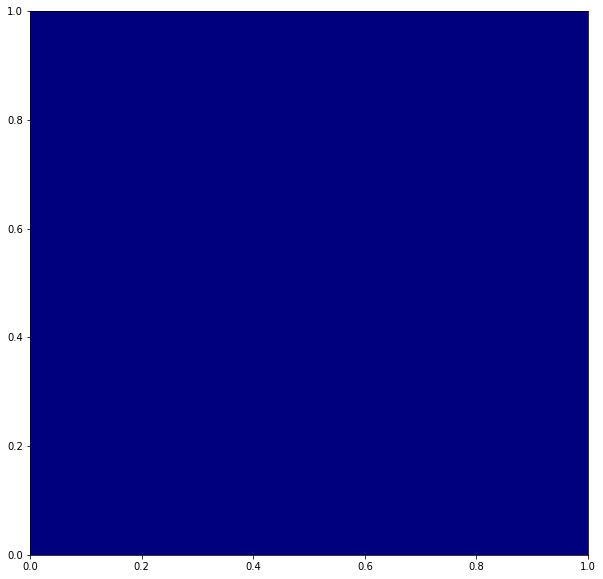

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(dist2, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(dist2),0,len(dist2)], aspect='auto')

In [83]:
motif_representatives

[array([ 1.        , 13.94521073,  6.11072516,  3.77451148,  6.58305403,
        16.57482334, 20.85236317, 17.76604875, 11.16212554,  4.27303734,
         5.63376169, 11.6930471 , 21.45157849, 18.73783936, 14.32007553,
         5.86783146,  5.30303566,  8.7861432 , 17.49745246, 20.10510991,
        16.9035912 ,  9.34882731,  3.98791823,  5.09178159, 13.83163492,
        21.51207869, 18.75259182, 12.44038451,  4.87362858,  5.32523002,
        10.4674526 , 20.41794439, 19.96670772, 16.17134545,  7.30709963,
         4.1082837 ,  7.07853199, 17.69928215, 21.33302758, 17.65857011,
        10.88709947,  3.39995721,  3.38857742, 12.15722285, 21.03219323,
        19.02426845, 14.78910029,  6.31006508,  3.82822588,  8.25129507,
        17.29484272, 20.18185509, 16.92275145, 10.80533502,  4.86241596,
         5.28727877, 12.34952271, 20.72412995, 18.76925145, 14.31767409,
         6.19043382,  4.56858519,  7.81108714, 18.66399527, 20.39060836,
        16.96527386,  9.68155896,  4.28026659,  5.9

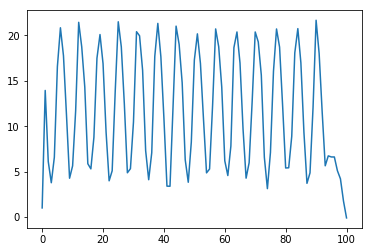

In [84]:
plt.plot(motif_representatives[0])

In [85]:
motif_representatives = pd.DataFrame(motif_representatives)

In [185]:
#Saving motif representatives

In [86]:
motif_representatives.to_csv(train_root + "motif_representatives", header=False, index=False)

In [87]:
len(clusters)

138

In [88]:
len(motif_representatives)

77

In [89]:
motif_representatives

0          1          2          3          4          5          6    \
0    1.0  13.945211   6.110725   3.774511   6.583054  16.574823  20.852363   
1    2.0  21.293904  13.478089   2.428152   1.633034   4.636507  12.009997   
2    3.0  13.845131   8.515959   6.545038  12.150612  20.211339  18.877240   
3    4.0  19.273983  13.750491   8.334104   4.047105  13.852946  24.286676   
4    5.0  10.850201   6.669771   0.897422  14.675660  26.228727  17.276557   
5    6.0   7.541563   4.677131  15.830608  24.379524  17.969401   7.418181   
6    7.0   5.057411   7.931349  21.259262  21.058215  11.346902   4.478969   
7    8.0  25.022612  16.623340  10.879064   0.781534   8.187809  25.576759   
8    9.0  14.814229   5.418750   8.688734  21.947683  20.576957  13.106131   
9   10.0  -7.616681  -6.450056  -3.301178  -0.038427   1.850688   2.928282   
10  11.0  -1.619213   9.191078  20.430652  16.733369   0.644303 -15.724437   
11  12.0  -3.683846  -4.030457  -4.478419  -4.385396  -3.147025  -1.339640   
12  13.0  -7.674356 -10.444032 -11.458874  -7.735006  -5.279593  -5.744147   
13  14.0   5.207303   3.538754   1.928400   0.223751  -0.964543  -1.579498   
14  15.0  -0.451044  -1.778374  -2.782481  -2.906443  -2.157165  -2.510860   
15  16.0  -2.112375 -14.605554 -10.874231  -4.703917   0.634797   4.016910   
16  17.0  -4.653259  -1.970352  -1.274734   0.375713   0.246590  -1.663239   
17  18.0   1.034971   3.494242  -1.663204  -6.657205  -3.727501   3.077287   
18  19.0   0.237057   3.625889   0.522407  -9.015159  -5.773906   1.571741   
19  20.0   1.967652   4.462588   4.669427   1.921762  -7.083569 -13.472475   
20  21.0  -1.093522  -1.385020  -1.395010  -1.314706  -0.696885   0.086202   
21  22.0   0.676296   2.299946   4.484589   7.018296   8.504088   8.433531   
22  23.0  -0.913424  -3.051769  -3.518620  -2.643338  -1.227823  -0.670008   
23  24.0   6.900610   6.080926   4.995167   4.418993   4.403029   0.819826   
24  25.0   0.408776  -6.869251 -14.688463 -10.156633  -3.789550  -0.268974   
25  26.0  15.073068  16.007182   9.699865  -1.546116  -8.032895 -13.476538   
26  27.0   6.776887  -0.199338  -6.501583 -10.329791  -9.371356  -8.143640   
27  28.0  -3.265756  -3.526395  -2.920863  -4.374817  -2.738178  -3.519152   
28  29.0  -2.504504   2.226251   6.408375   8.365136   8.390705   4.142547   
29  30.0  -2.990922  -3.040852  -3.145504  -2.994901  -2.952907  -3.058907   
..   ...        ...        ...        ...        ...        ...        ...   
47  48.0   3.638113   6.777294   5.924790   4.722990   2.845425   2.866177   
48  49.0  10.865663   6.011402  -3.413325  -6.958256  -6.897256  -6.067123   
49  50.0   6.281564   6.254296   6.604075   6.071727   6.667872   6.241517   
50  51.0   1.785612   3.897531   4.905439   4.059390   3.921638   1.585826   
51  52.0 -12.065985 -10.548916  -8.901158  -6.884018  -4.938369  -4.479327   
52  53.0  -3.981357  -2.768628  -2.171623  -2.765279  -2.764163  -0.919451   
53  54.0   4.257018   3.974360   4.144614   4.151684   4.024171   4.306880   
54  55.0  -4.637776  -3.938905  -3.051833  -3.312080  -6.387717  -7.830178   
55  56.0  -3.204697  -7.896614  -6.641872  -8.653788  -1.938421  -0.768801   
56  57.0   1.266284   2.111978   2.883706   3.364729   3.265162   4.623135   
57  58.0   2.355661   2.532531   2.572759   2.636782   2.706246   2.891588   
58  59.0  -0.434276  -2.123974  -3.936418  -2.905805  -0.477002   1.441548   
59  60.0  -1.796854  -1.794805  -1.128630  -0.275102  -0.107185  -0.311690   
60  61.0  -2.248669  -1.663623  -1.309689  -0.981051  -0.808106  -0.759568   
61  62.0  -2.815467  -3.344578  -4.111696  -2.948422  -1.826831  -2.100939   
62  63.0   2.947032  -3.241758  -9.921709 -13.173901  -8.733616  -4.933390   
63  64.0  -4.645397  -2.989725  -0.755819  -0.648485  -0.950378  -1.865134   
64  65.0   5.744428   0.097409  -5.231002  -7.864739  -4.774601  -7.270866   
65  66.0  -3.631050  -4.242661  -4.256960  -4.083104  -3.355117  -3.687909   
66  67.0  -6.921174  -7.783

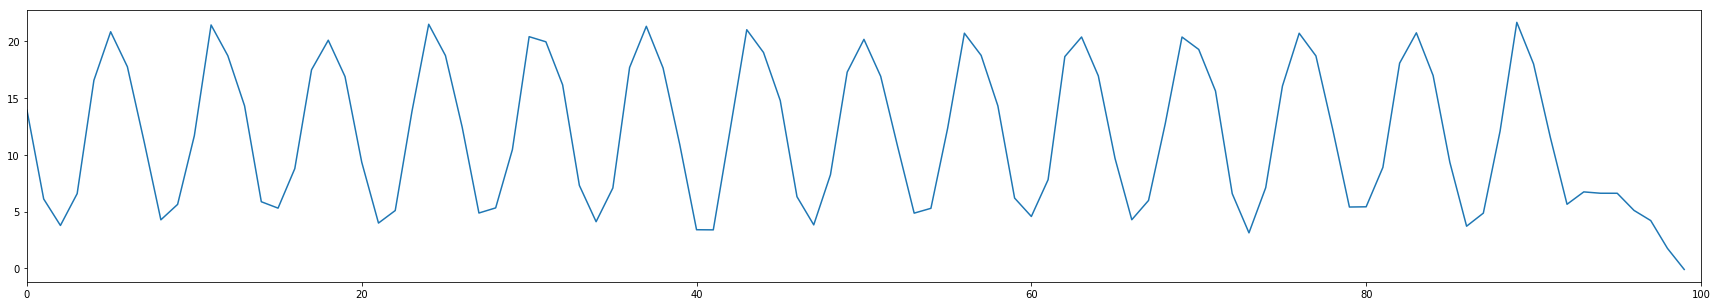

In [90]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(motif_representatives.T)-1)
plt.plot(motif_representatives.values[0,1:])

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


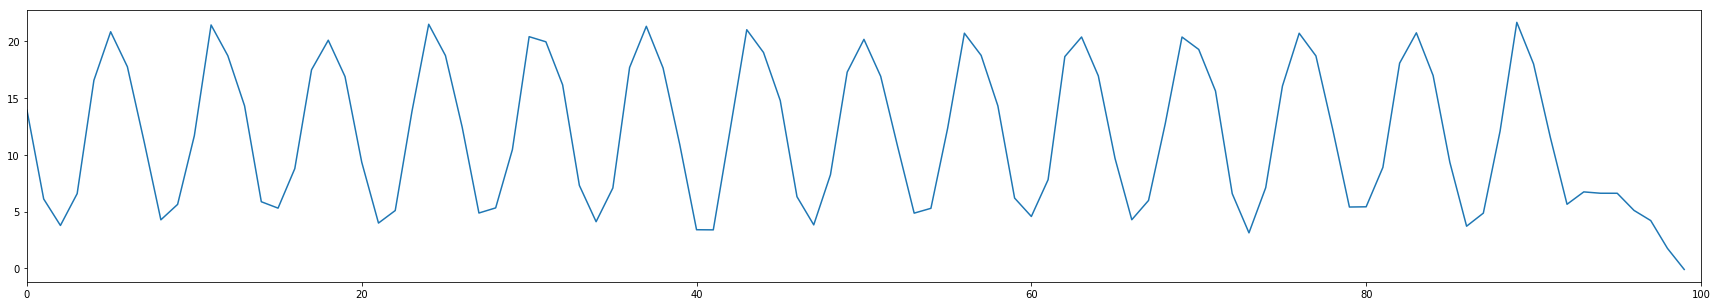

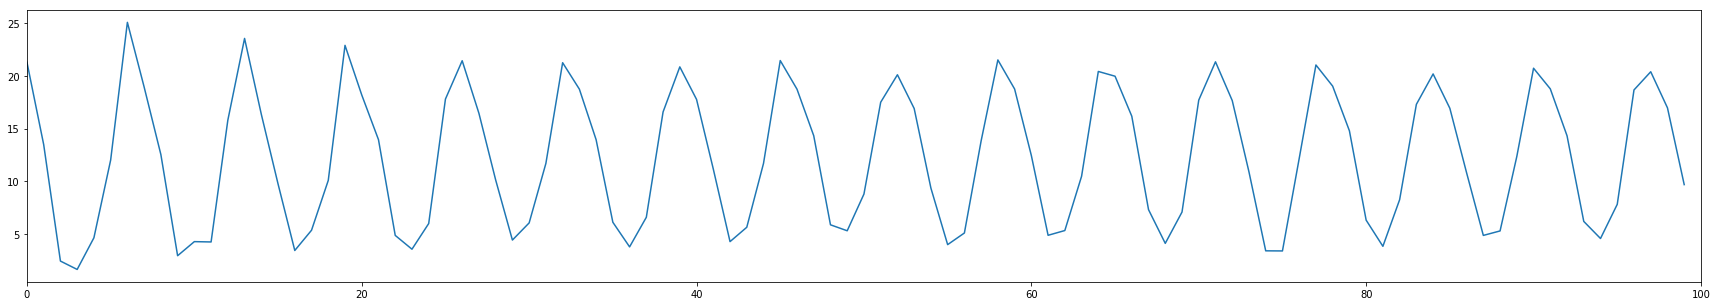

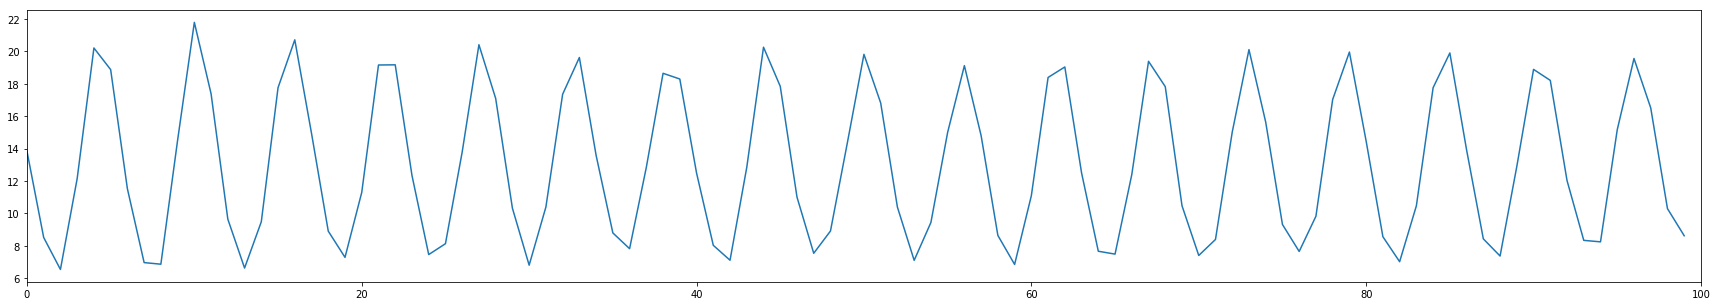

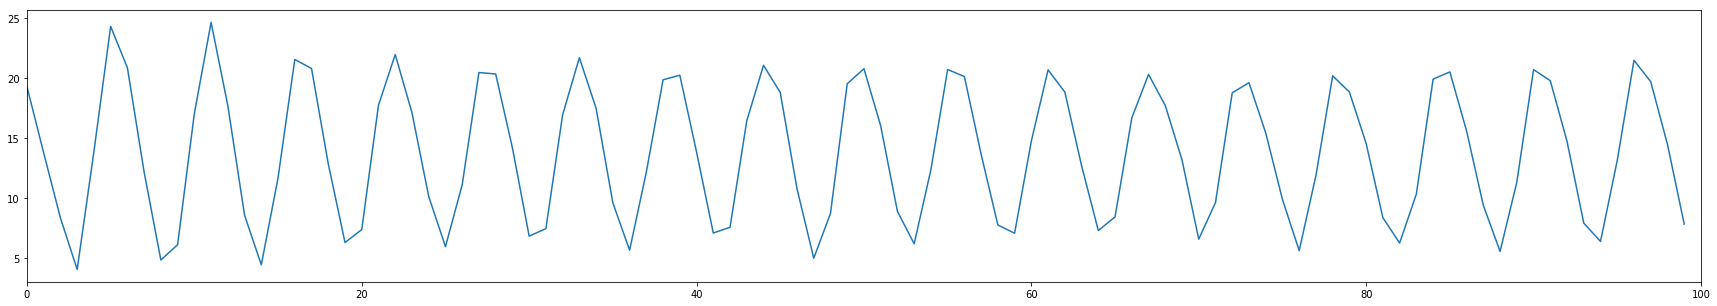

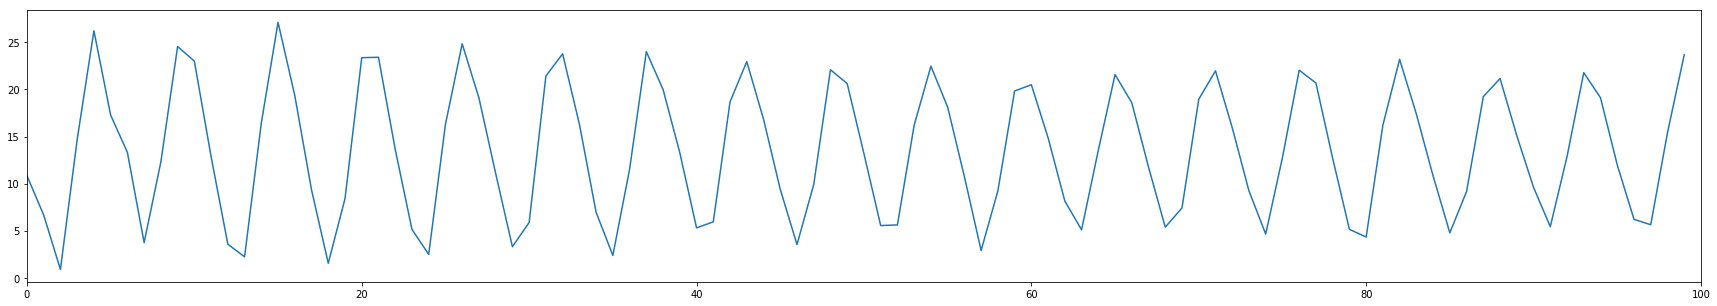

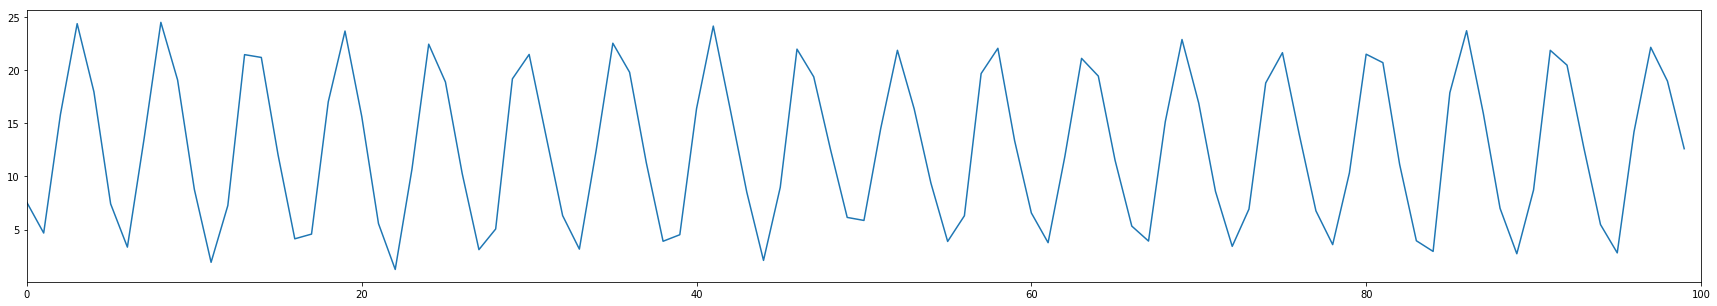

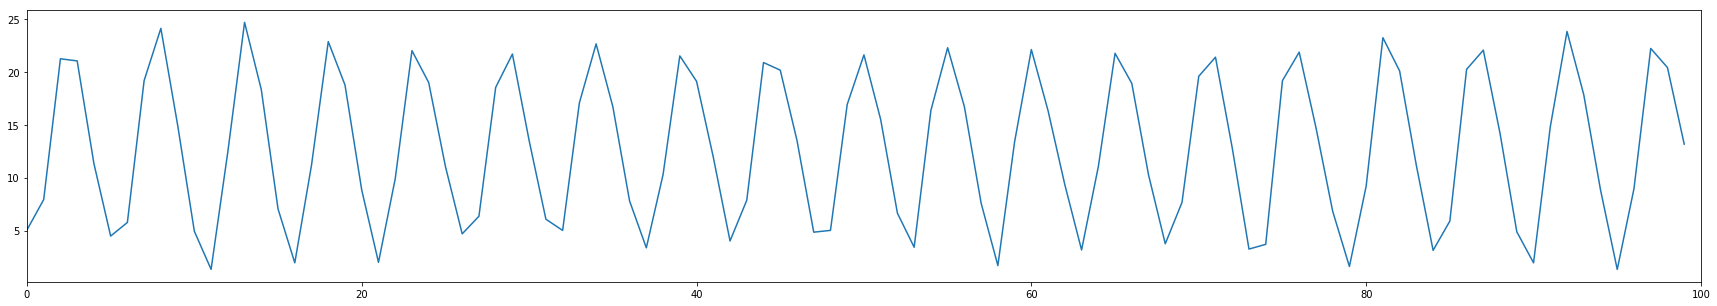

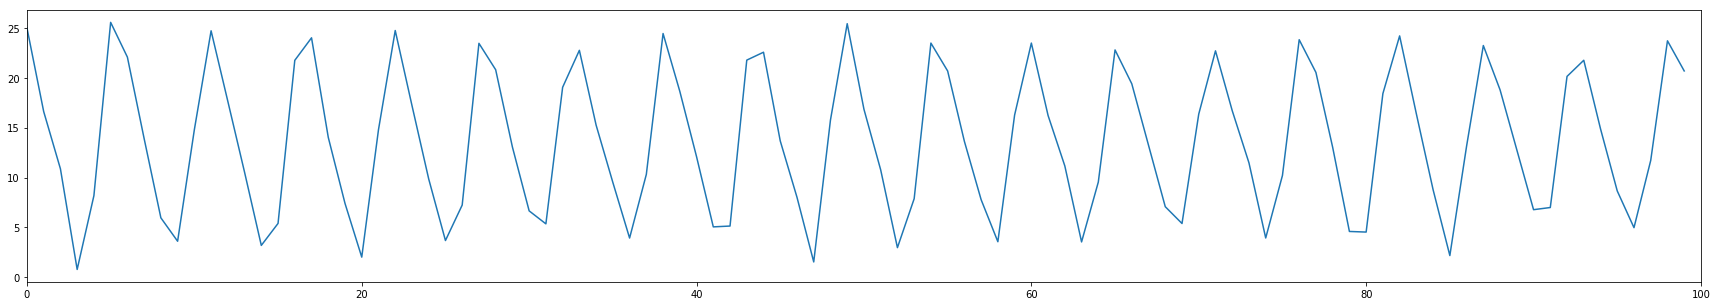

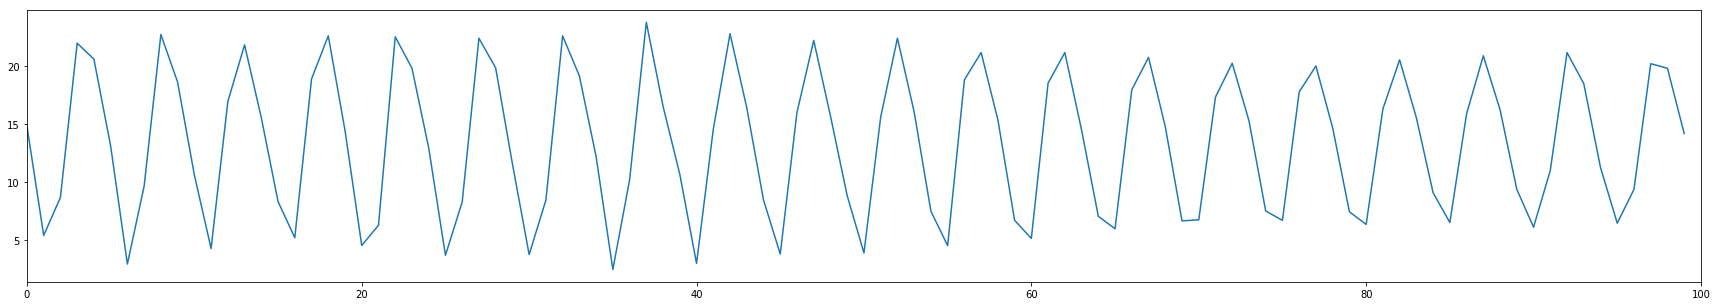

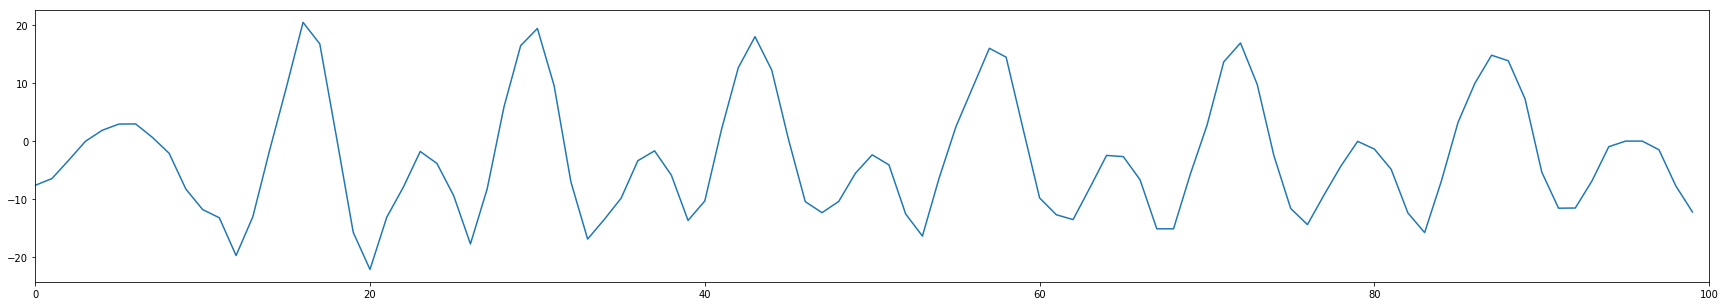

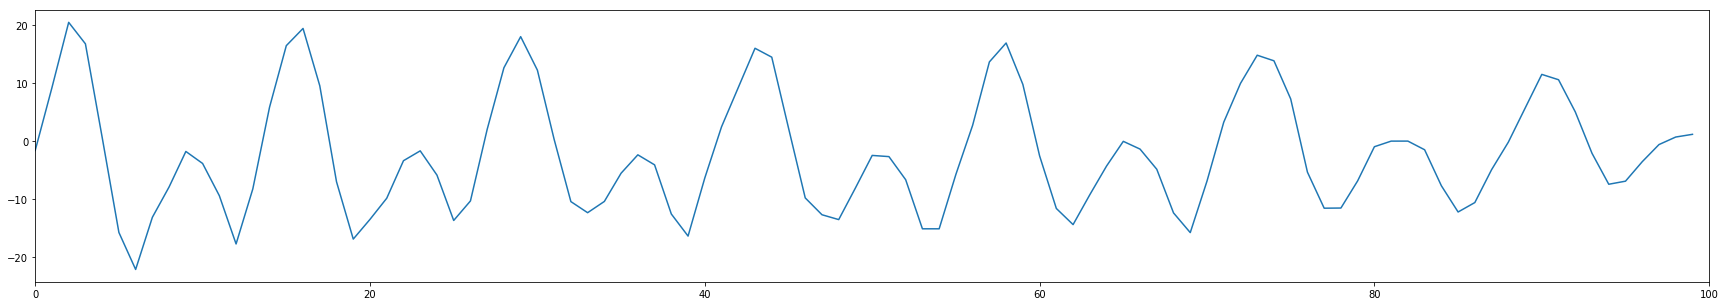

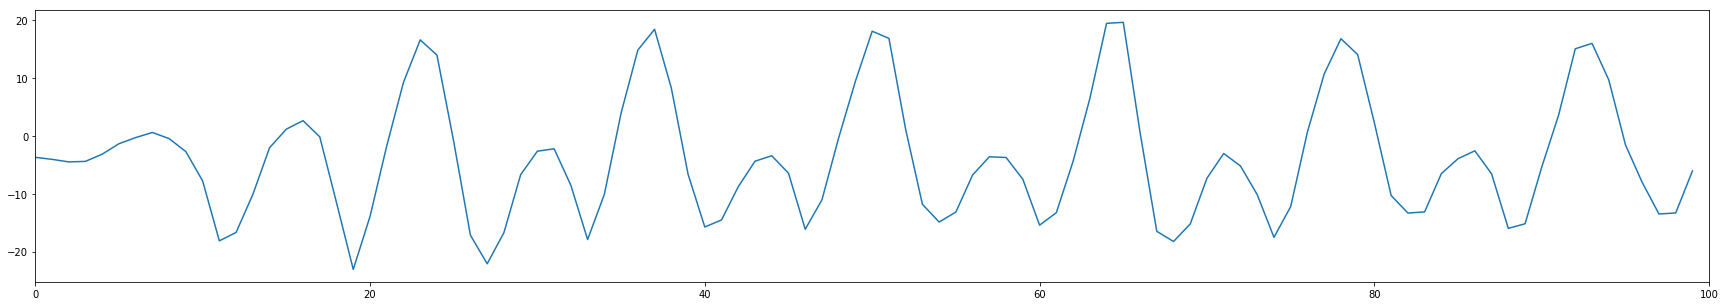

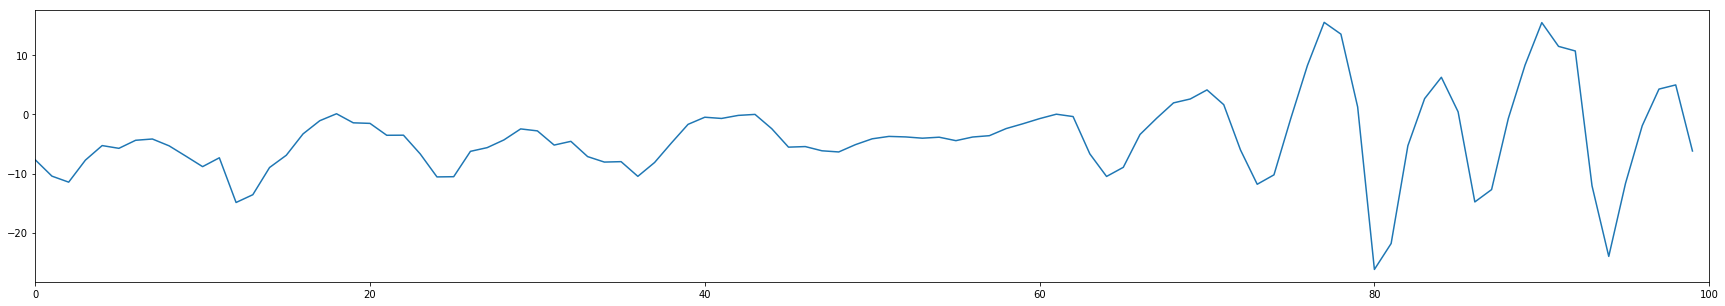

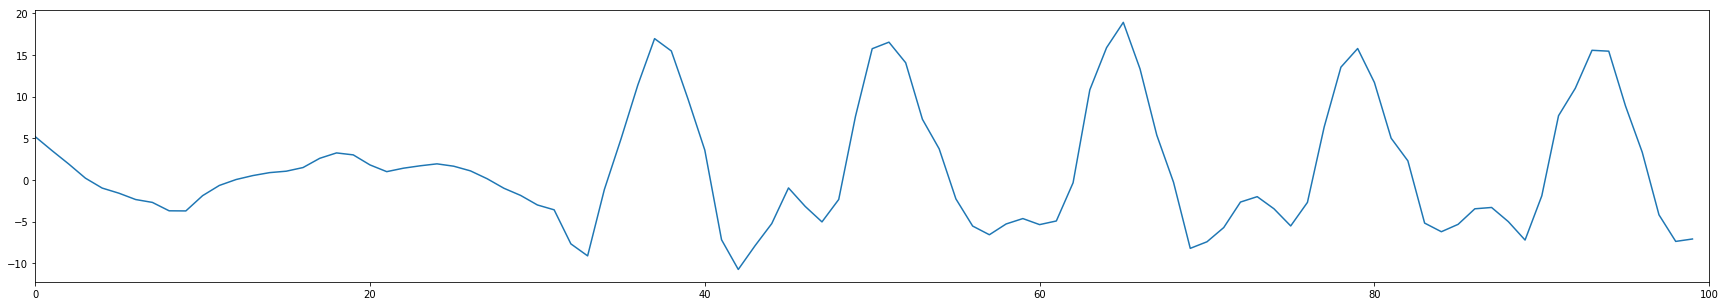

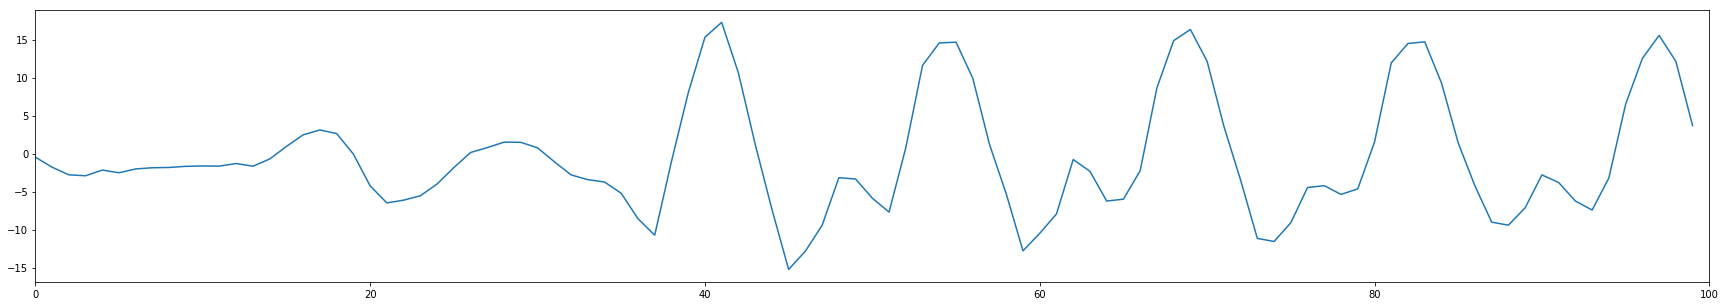

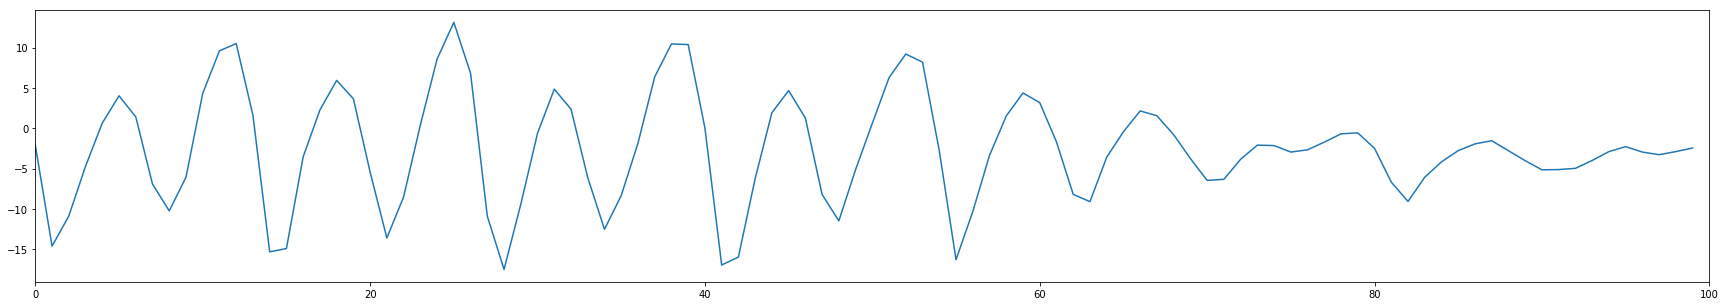

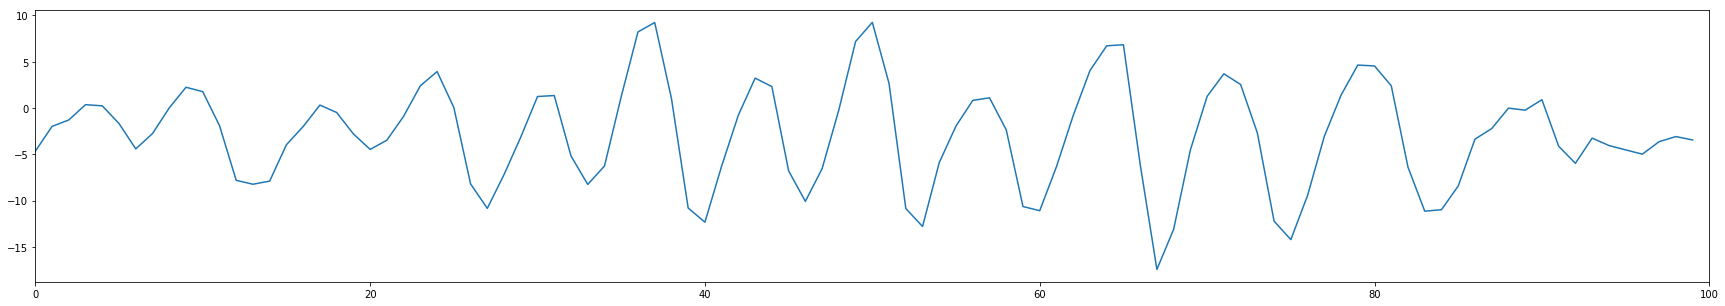

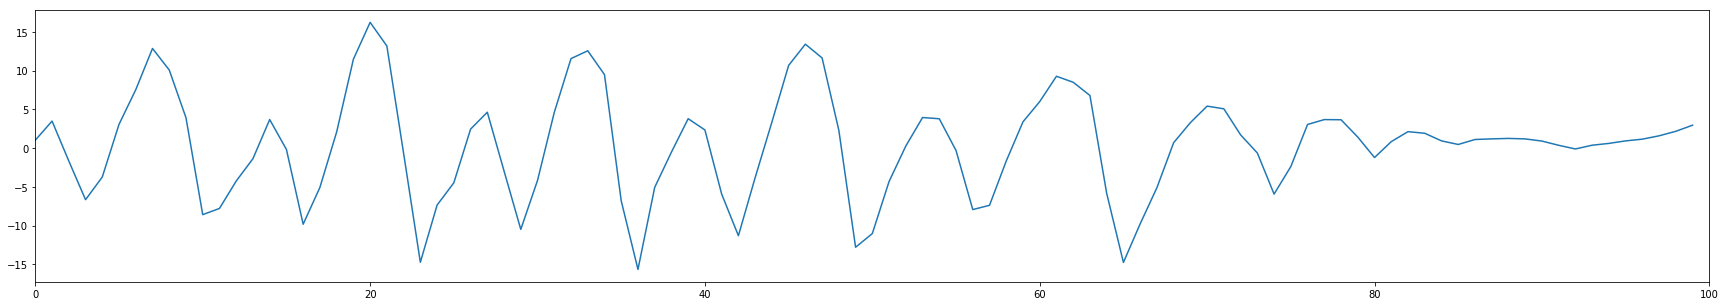

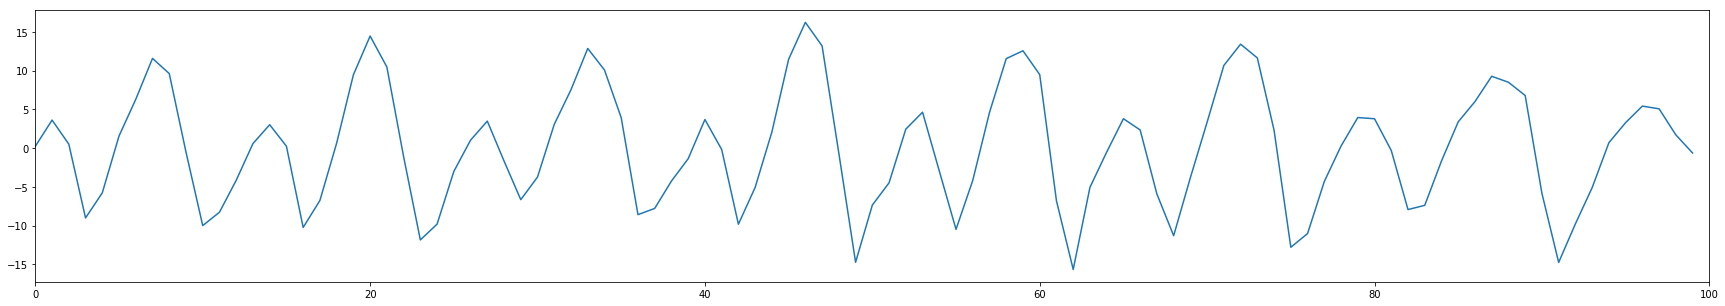

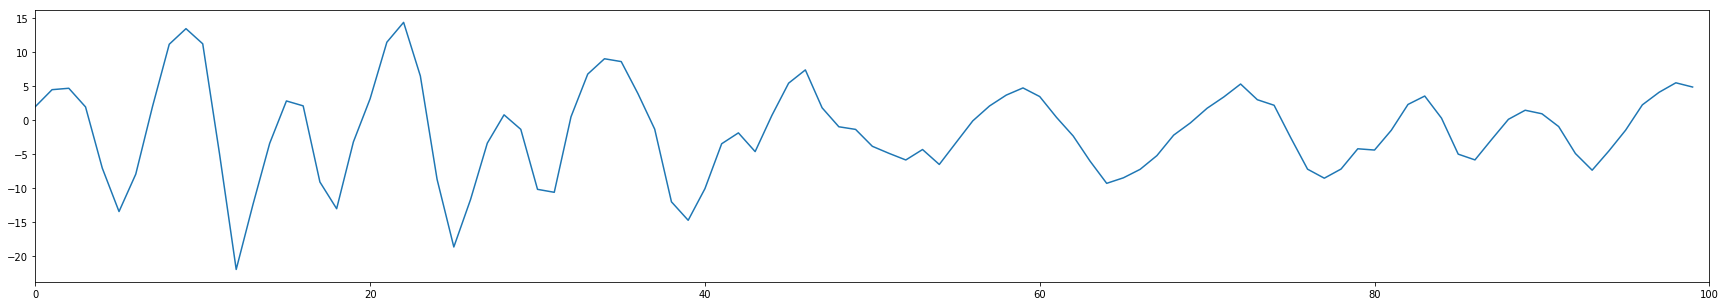

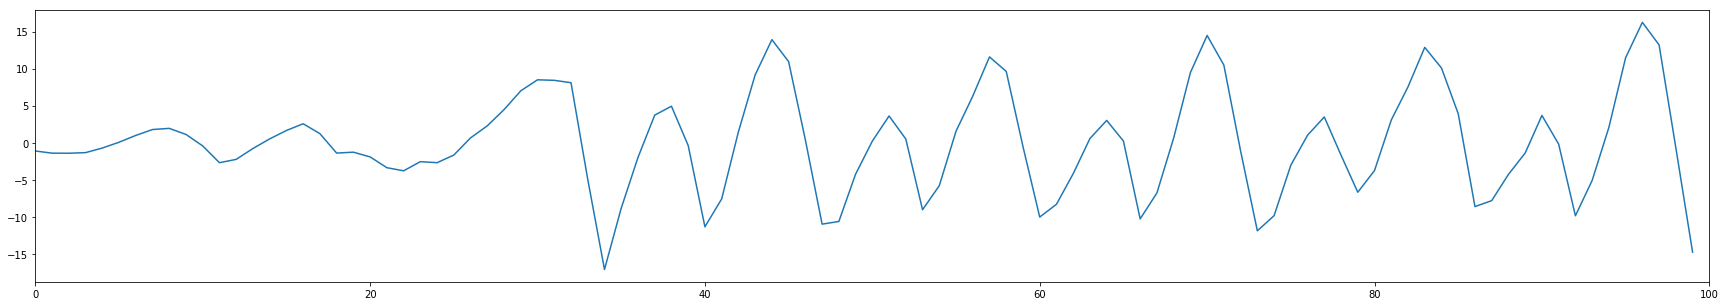

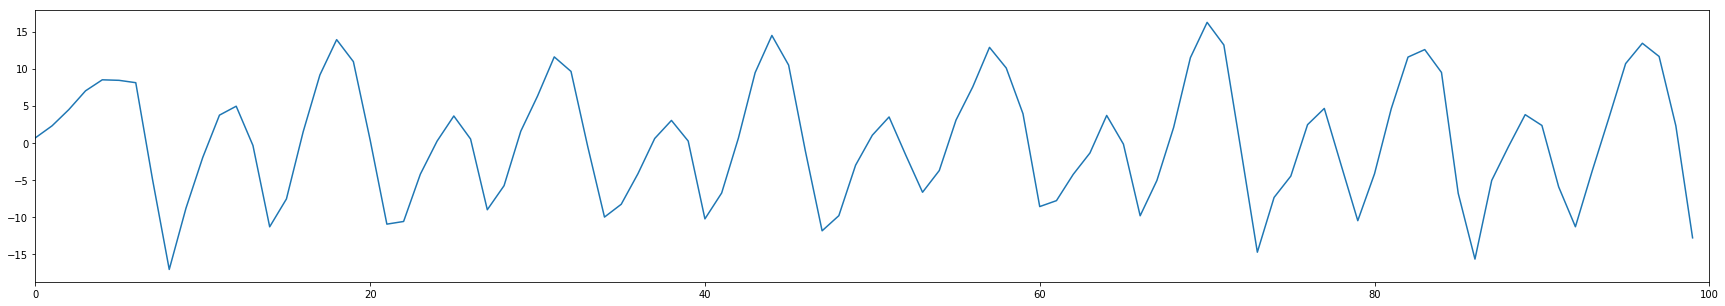

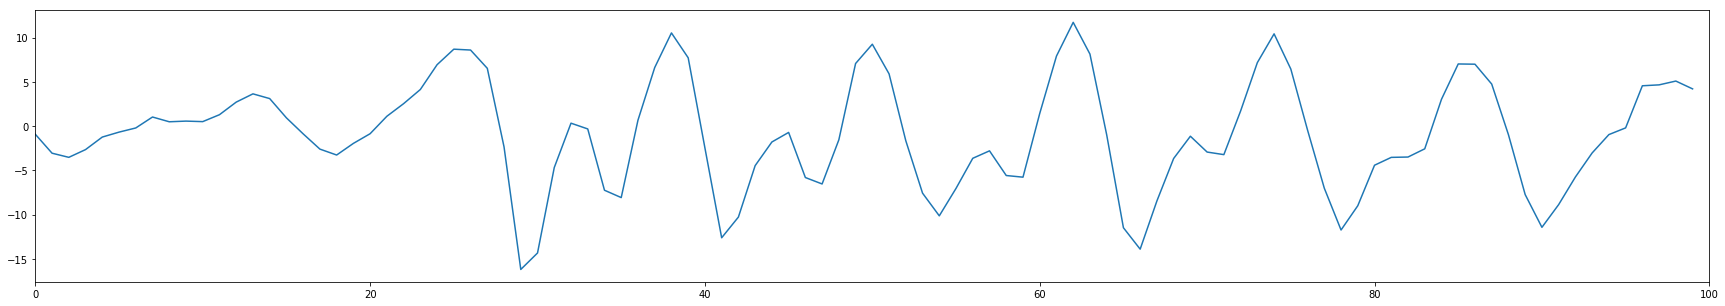

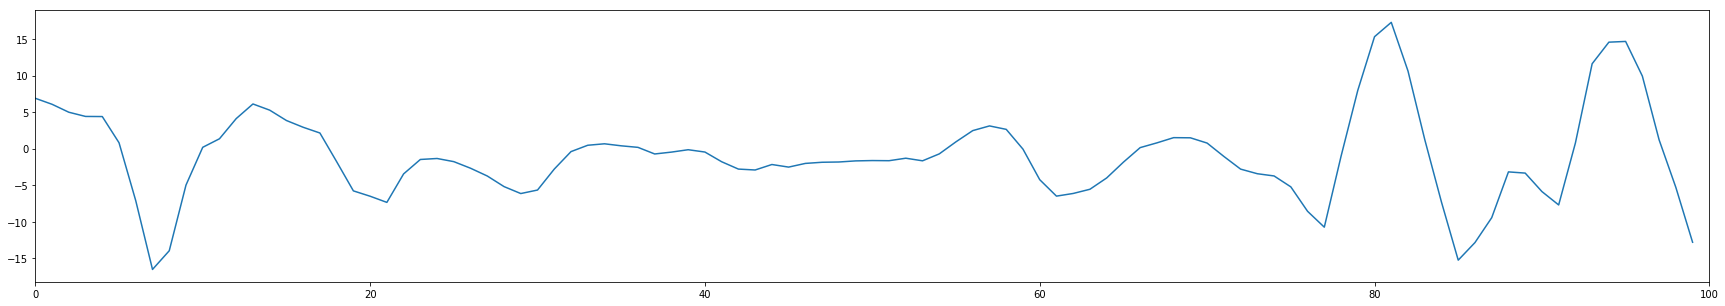

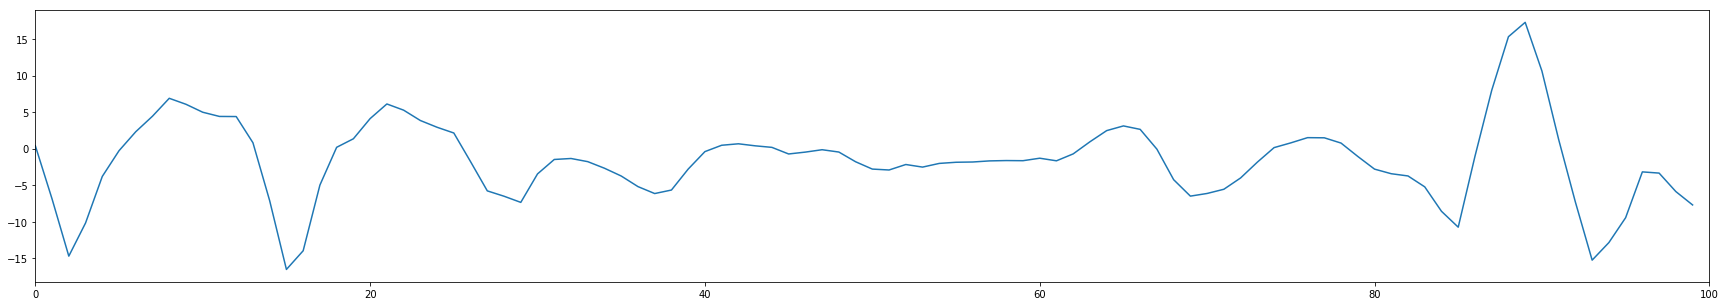

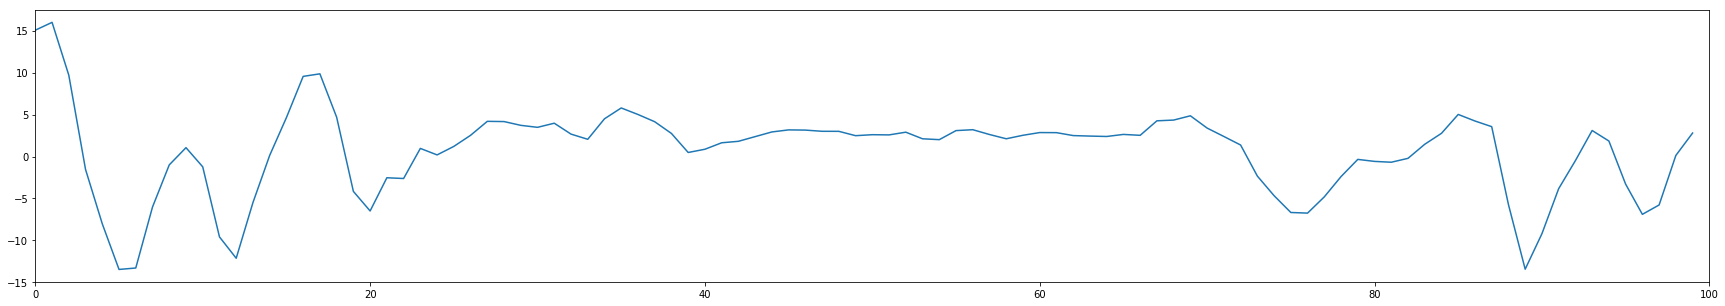

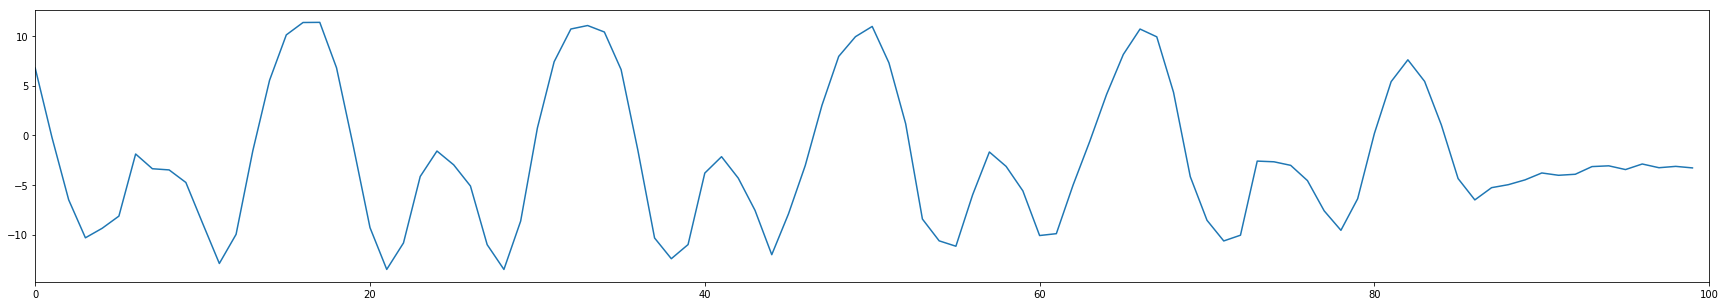

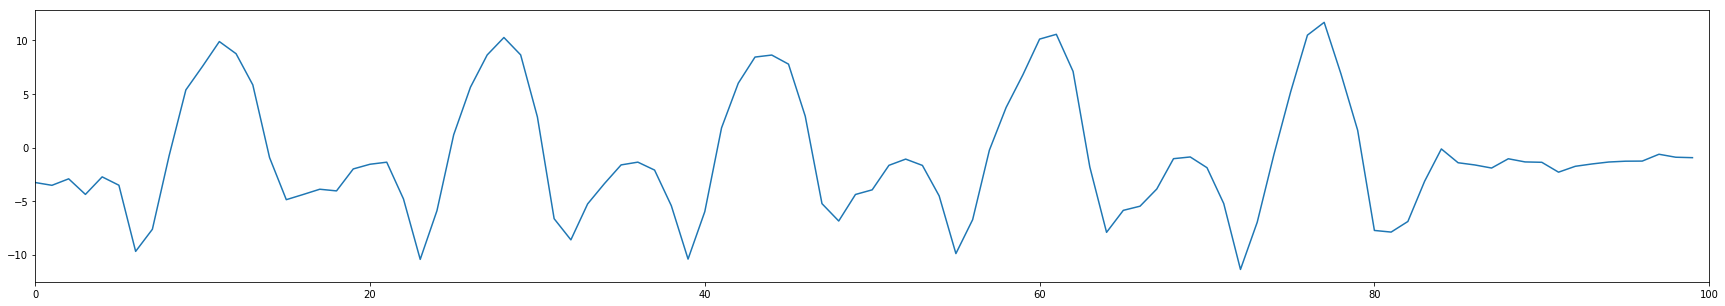

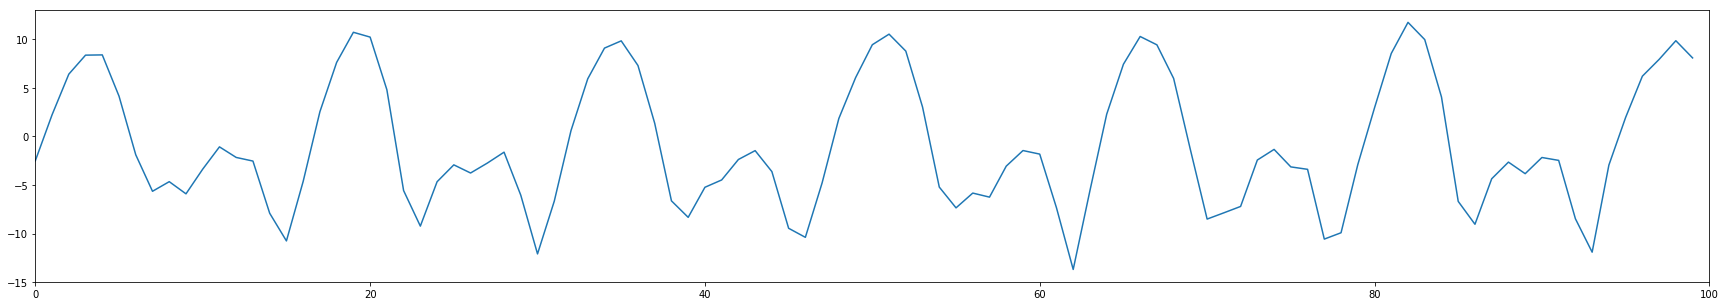

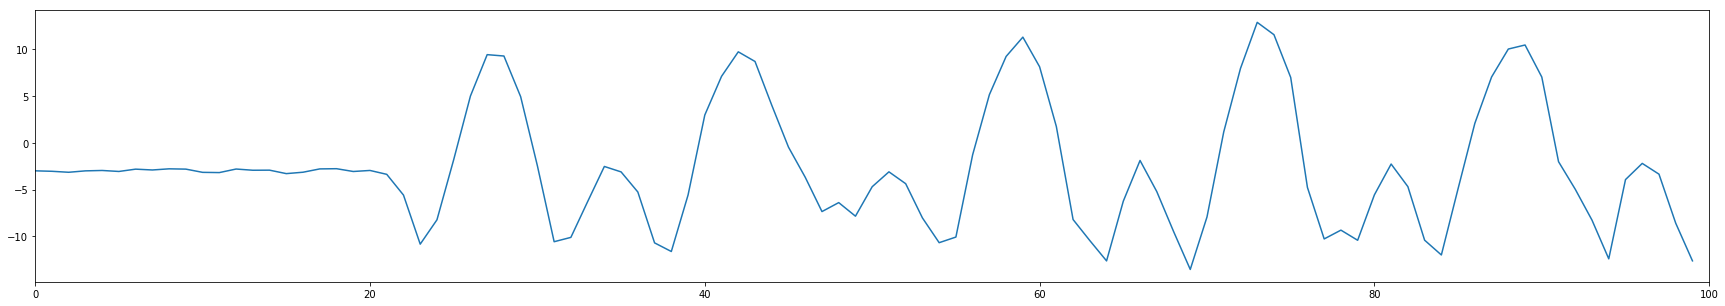

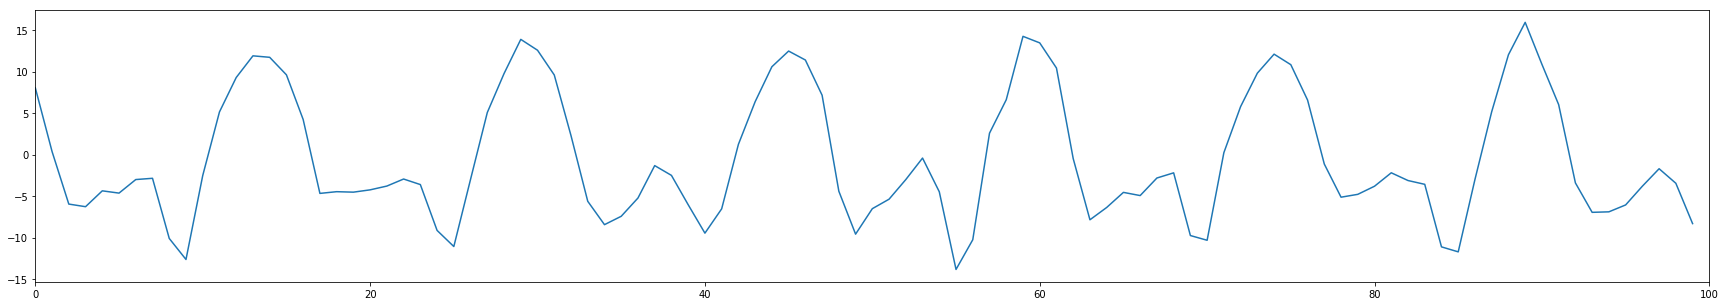

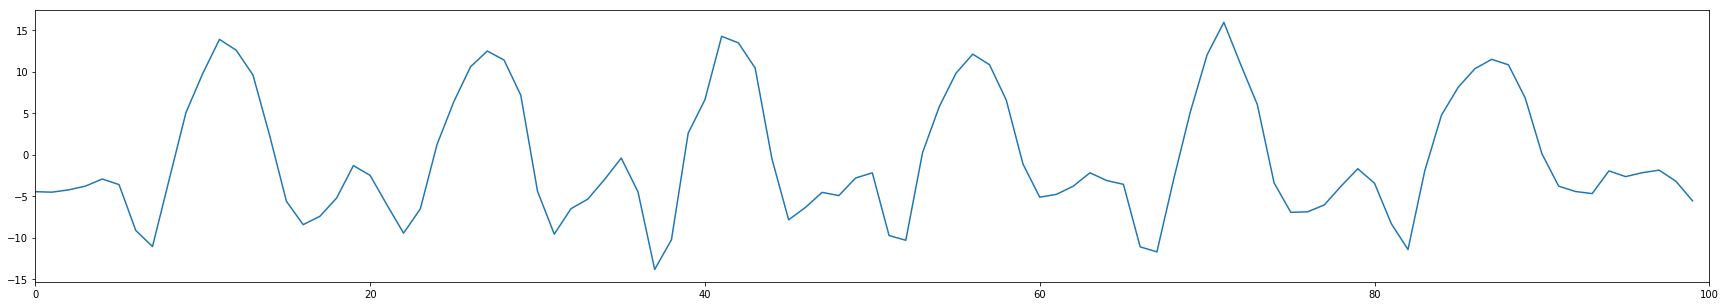

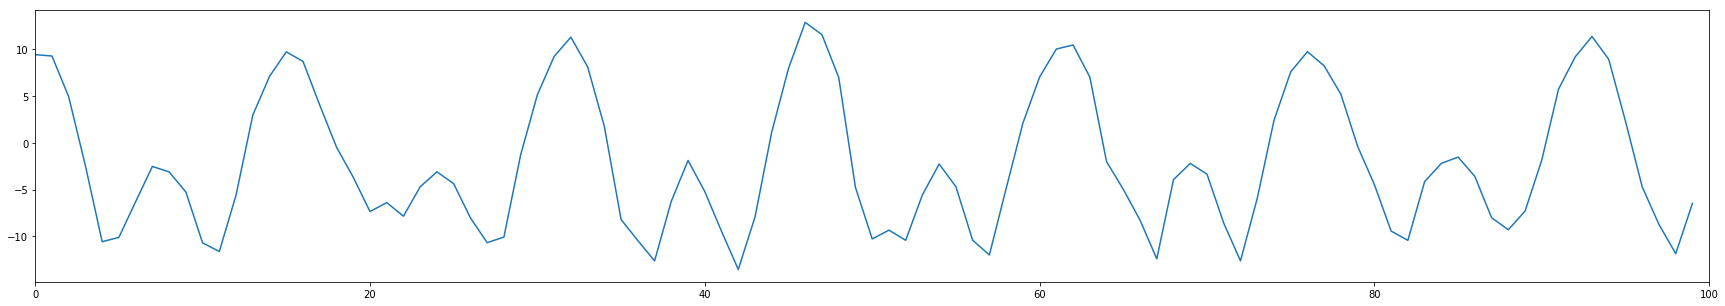

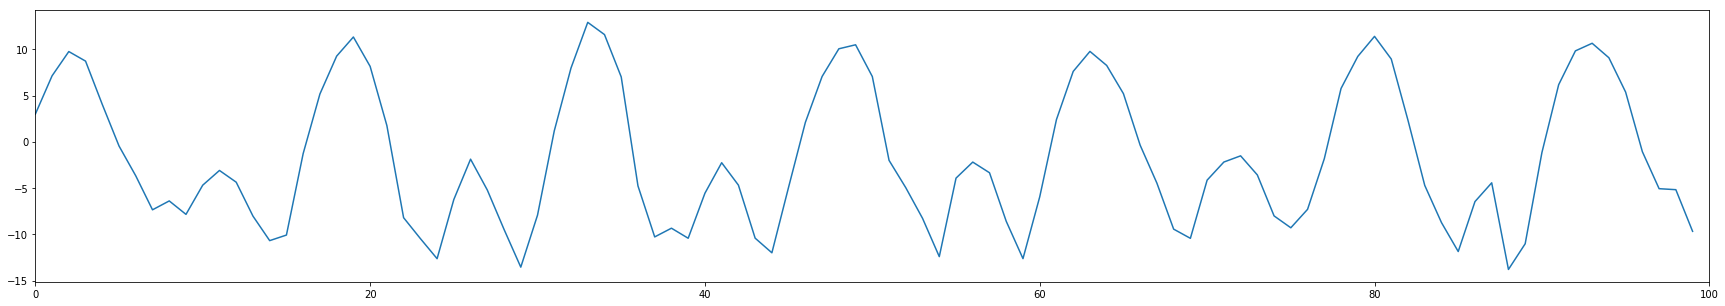

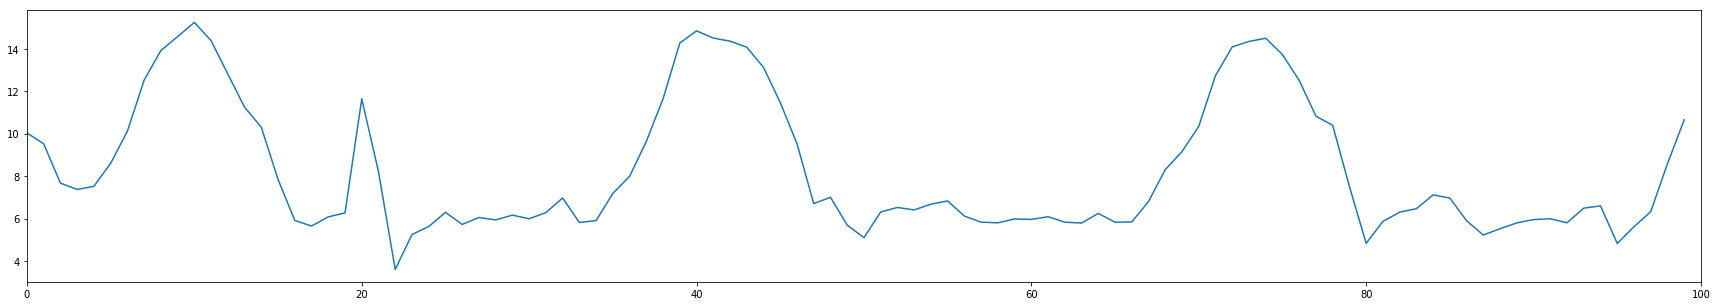

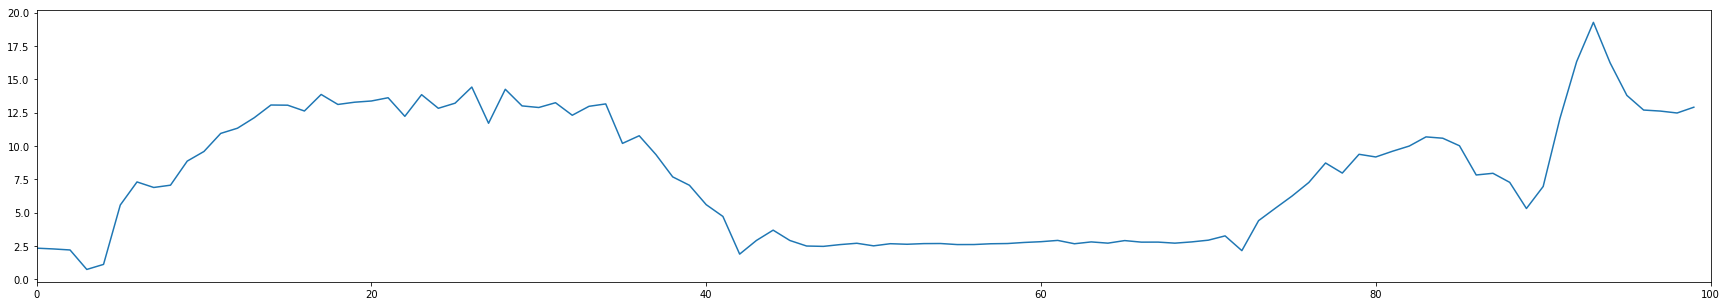

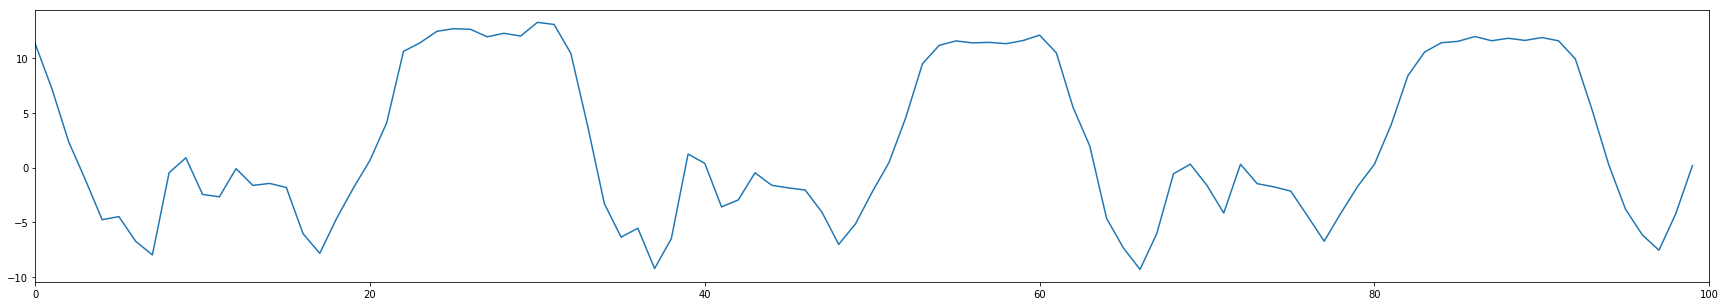

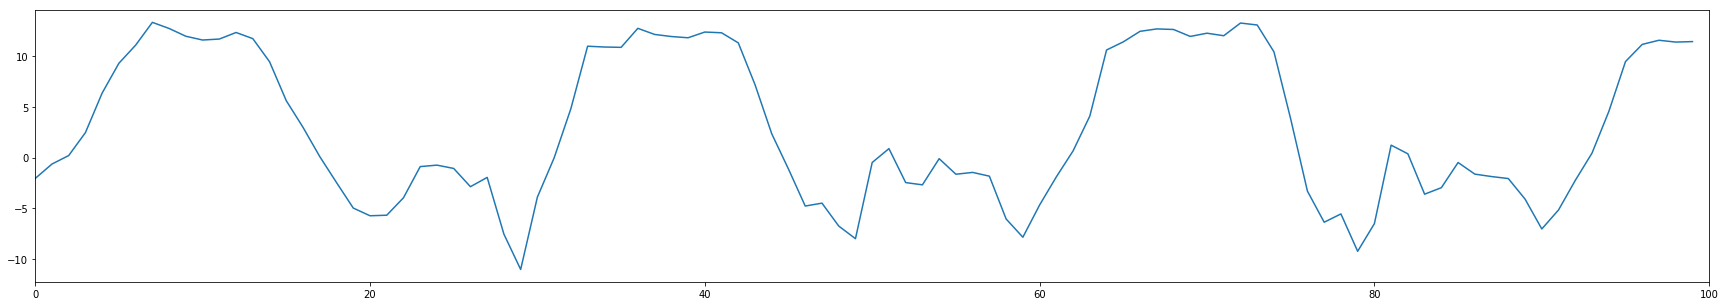

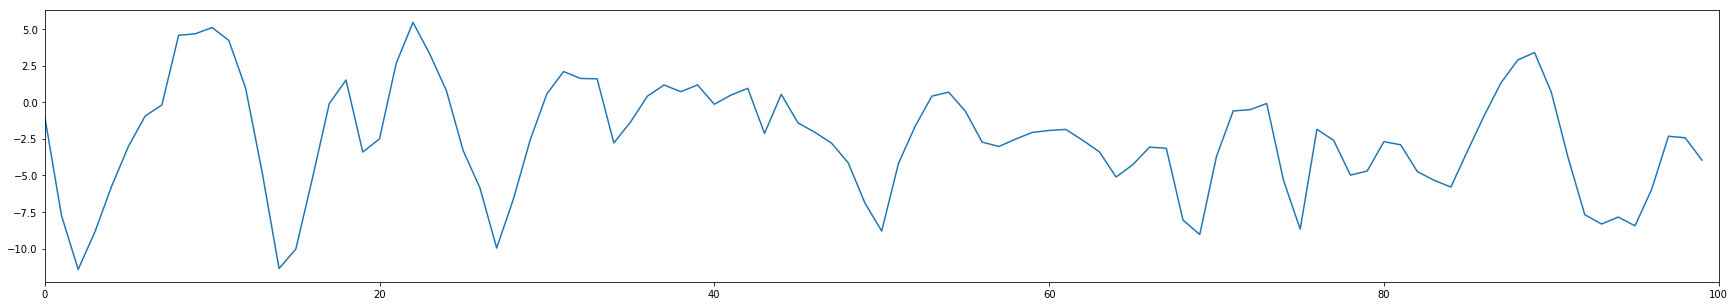

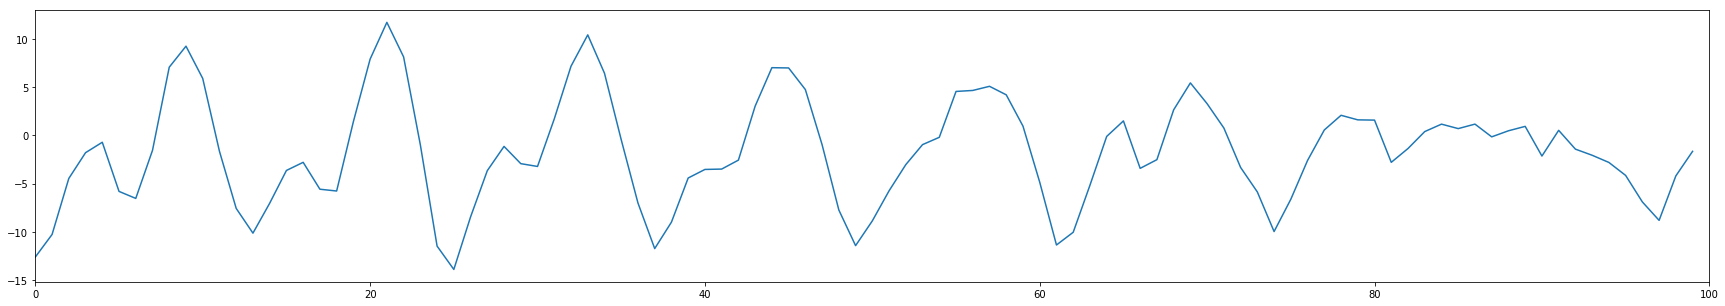

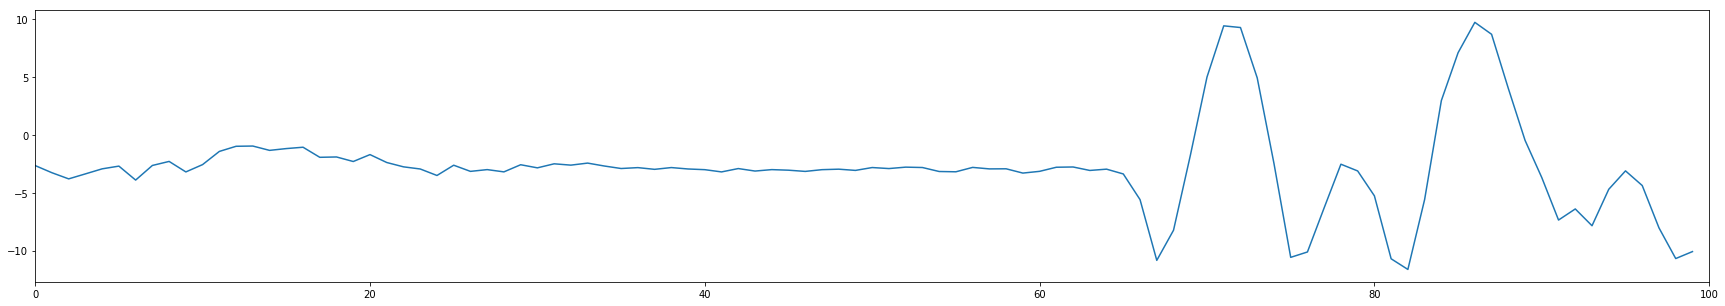

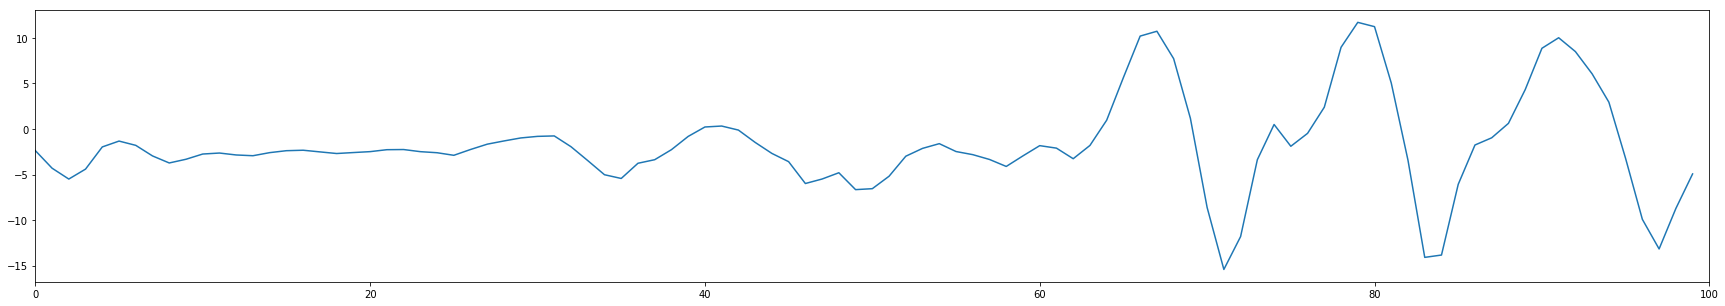

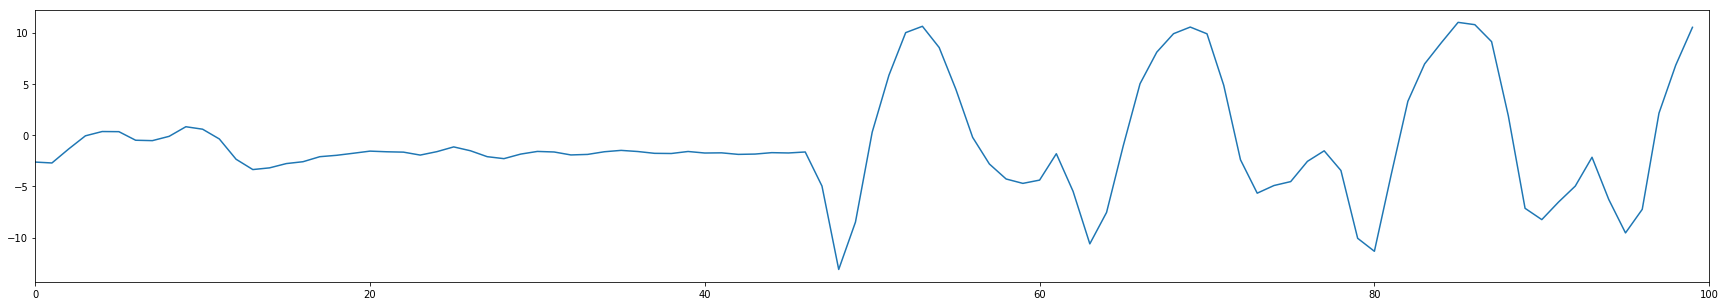

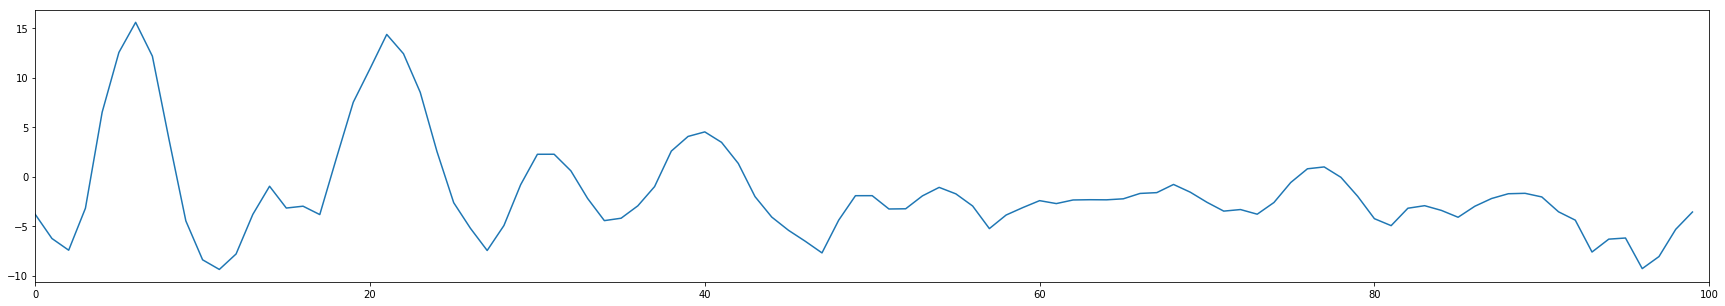

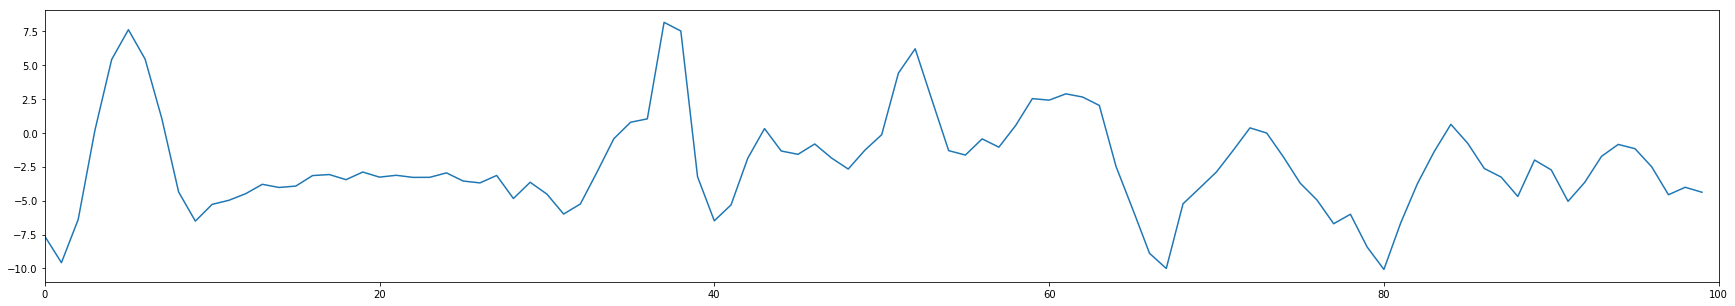

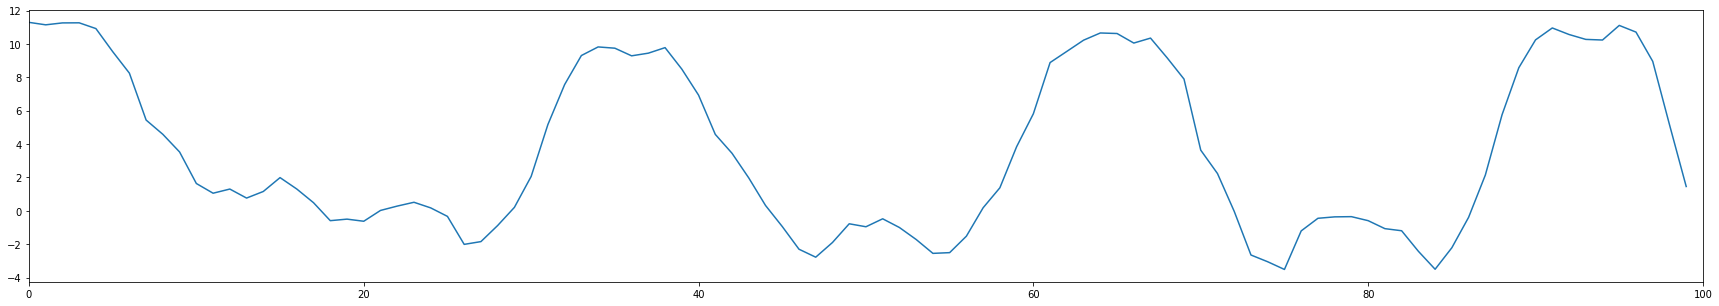

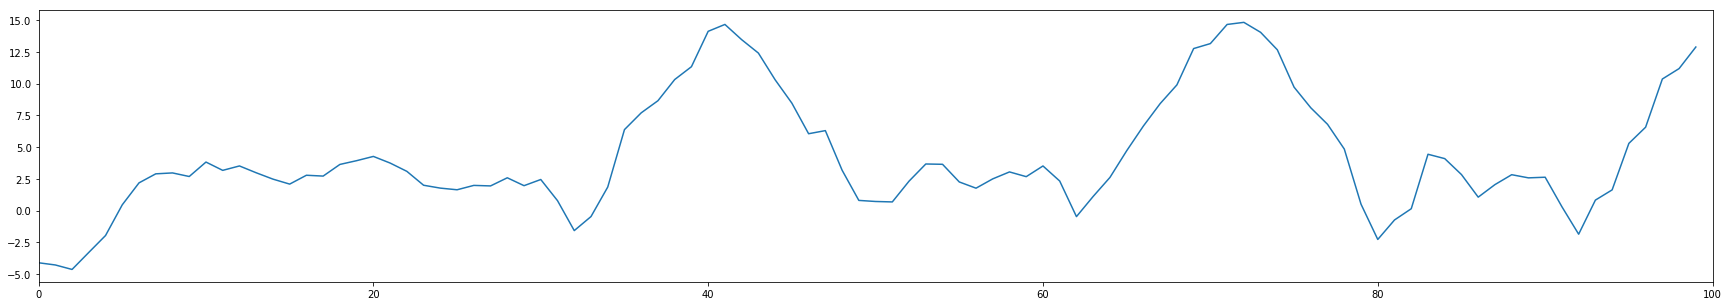

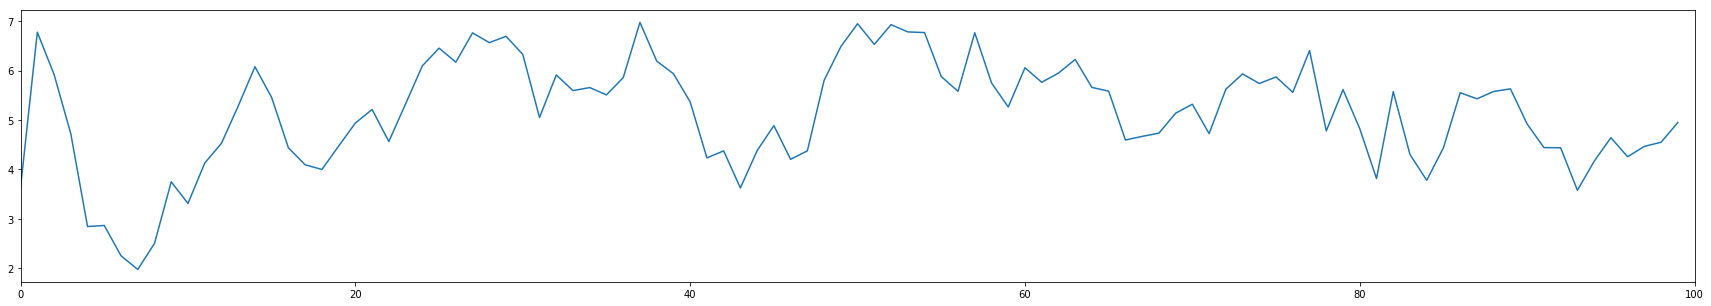

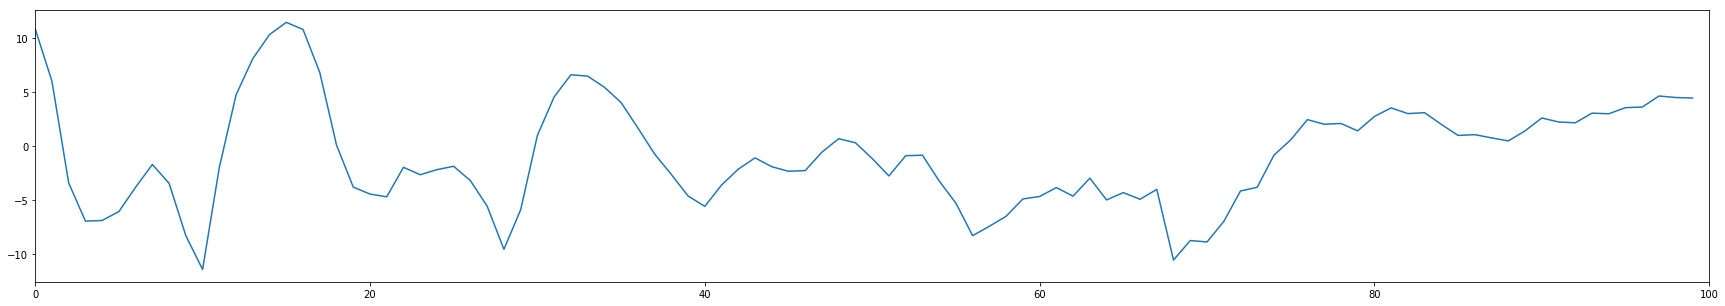

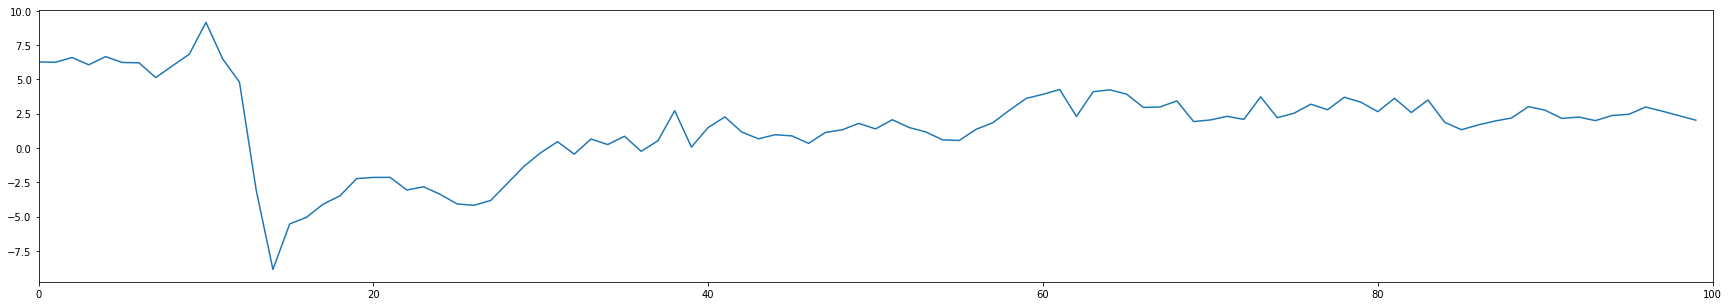

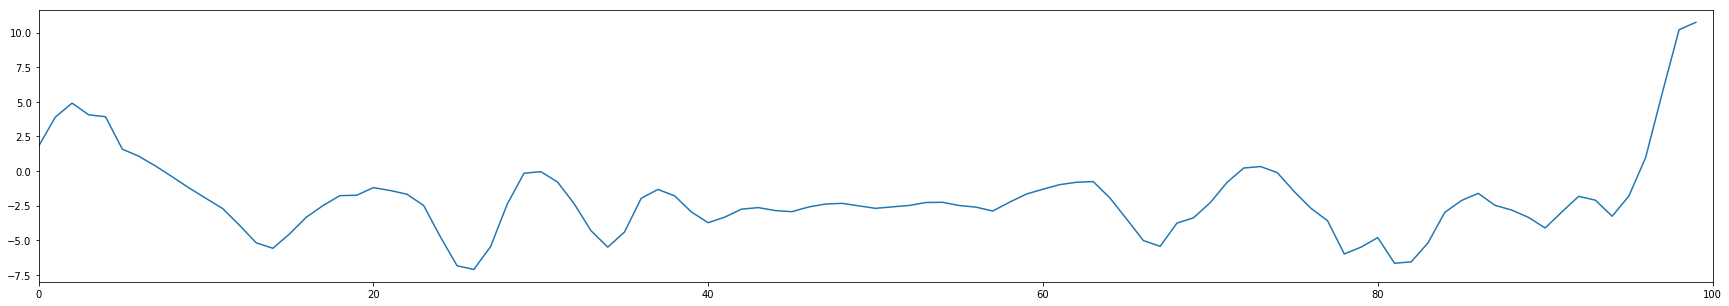

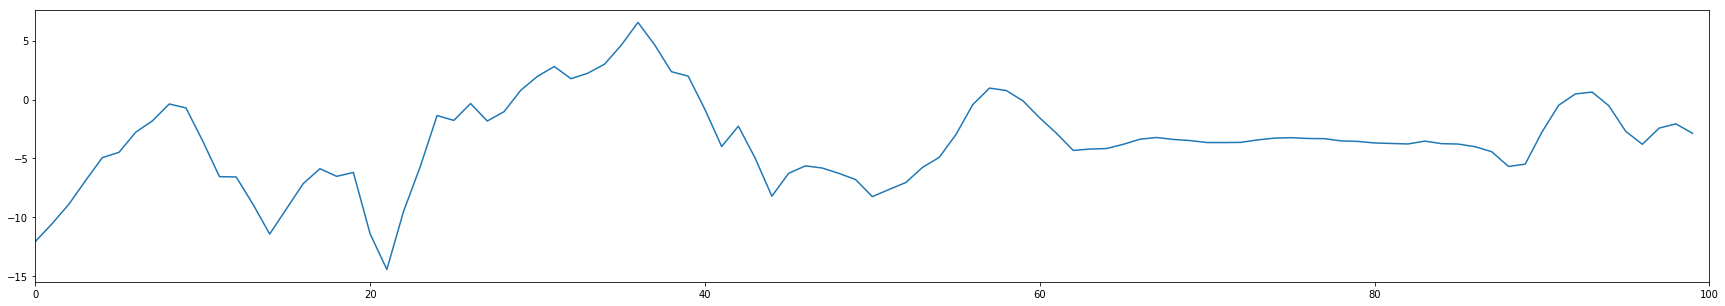

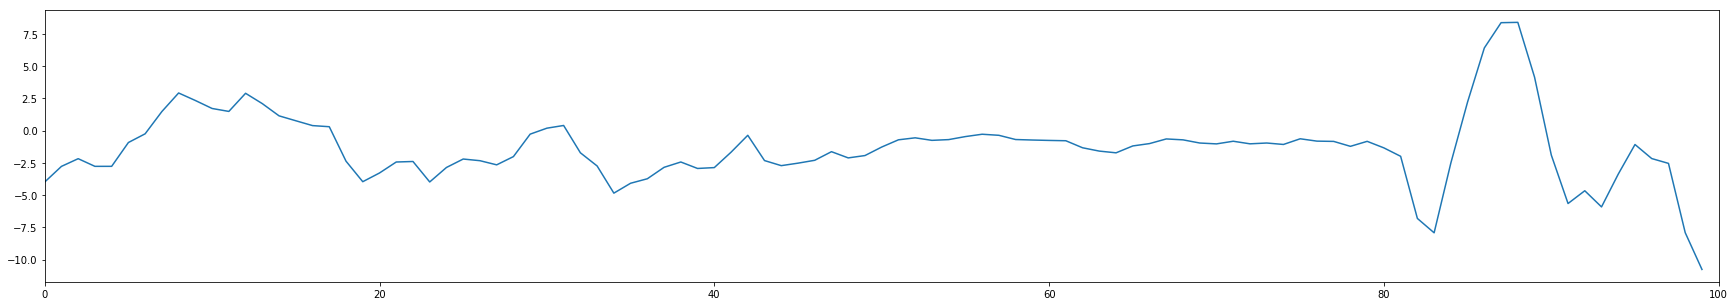

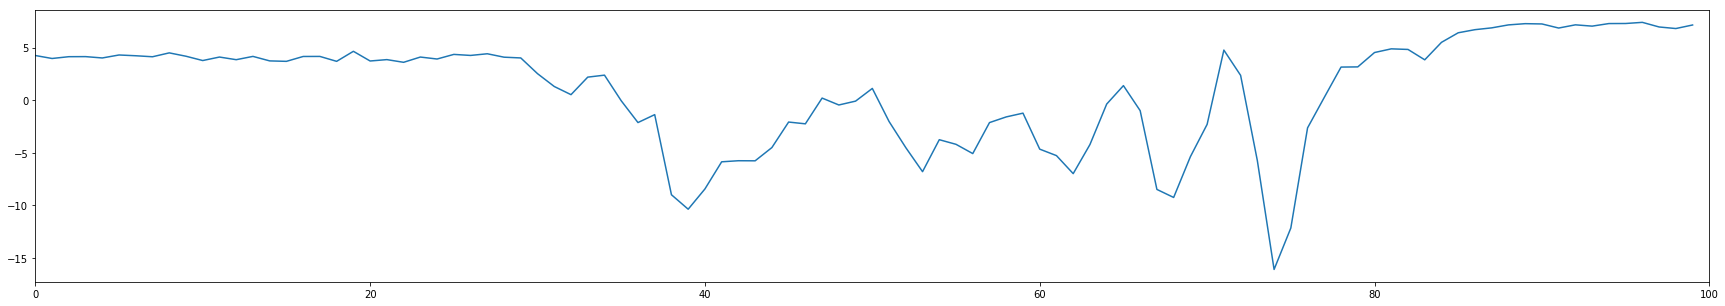

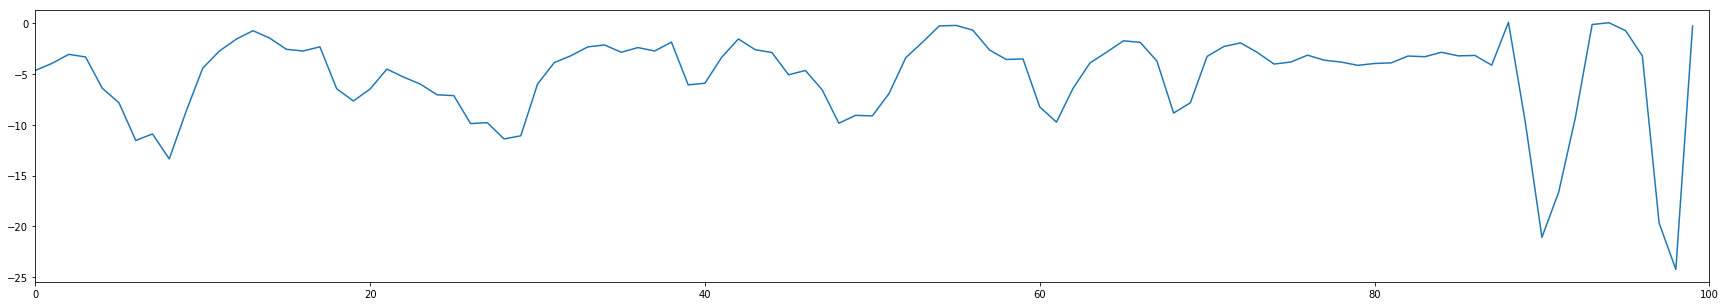

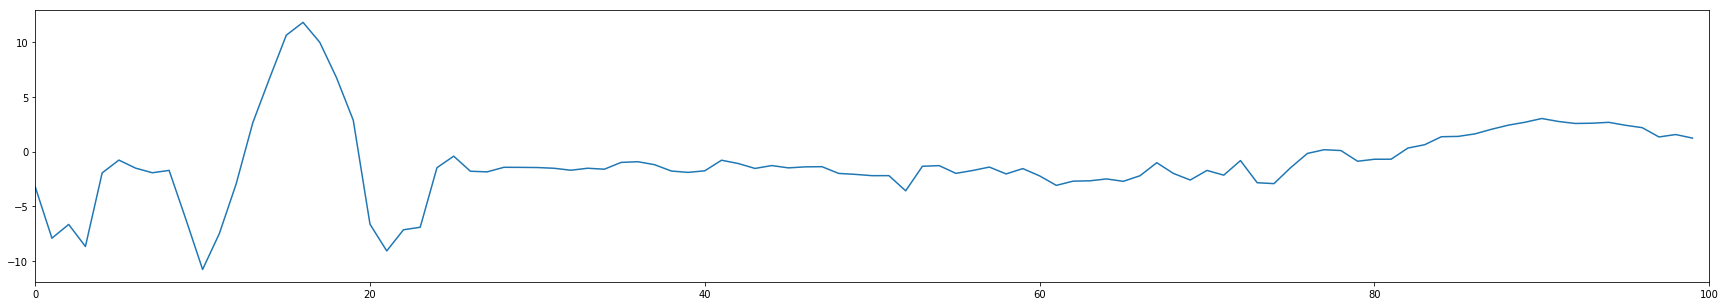

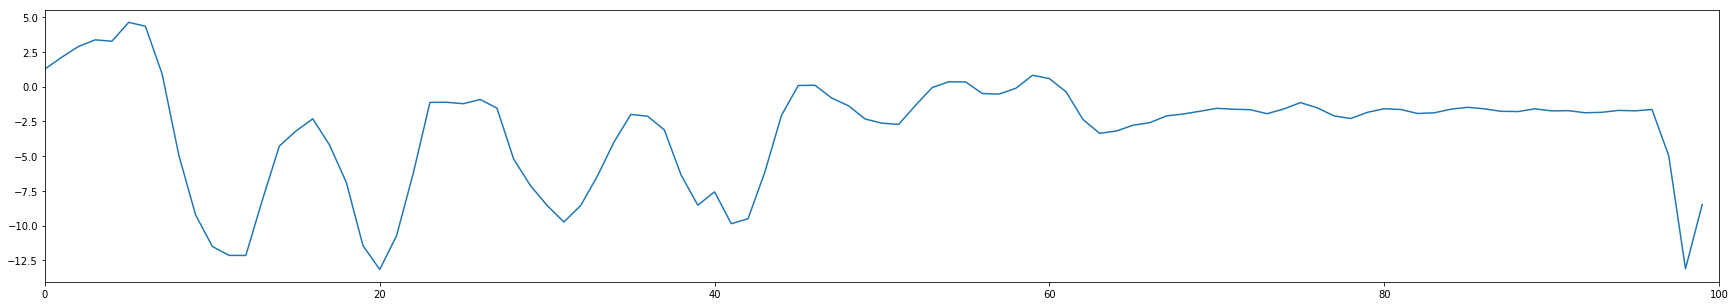

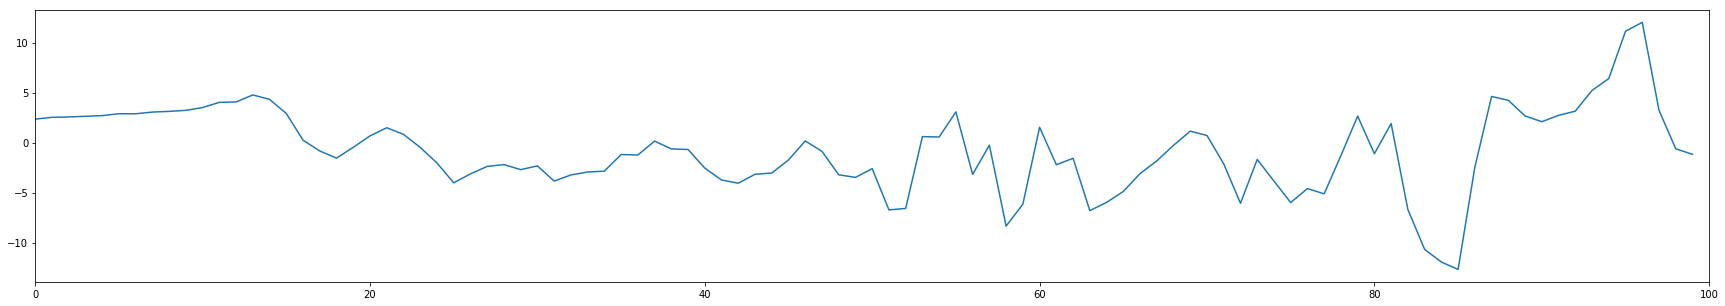

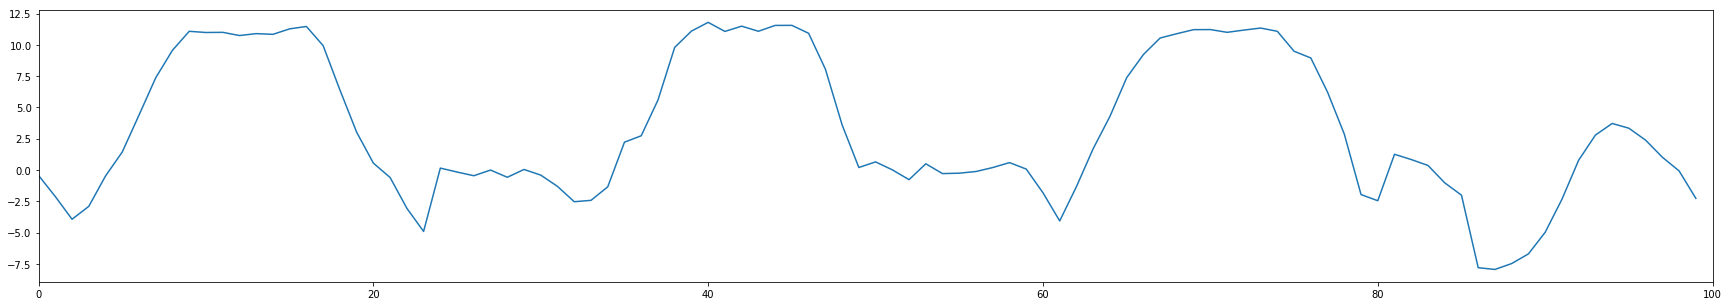

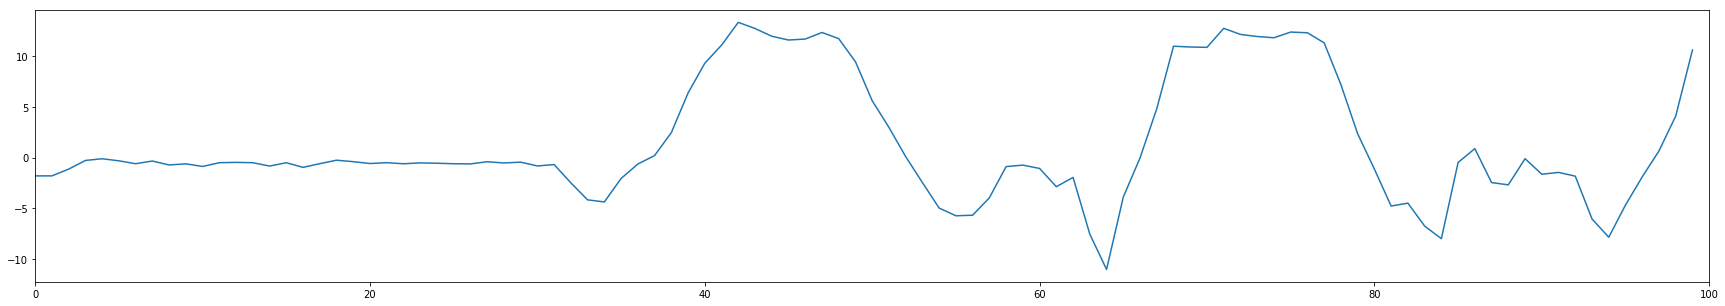

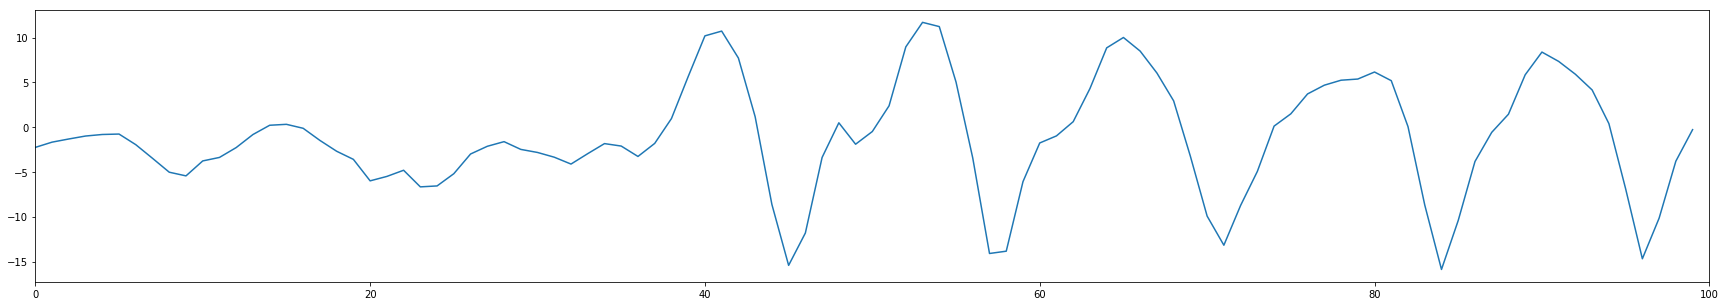

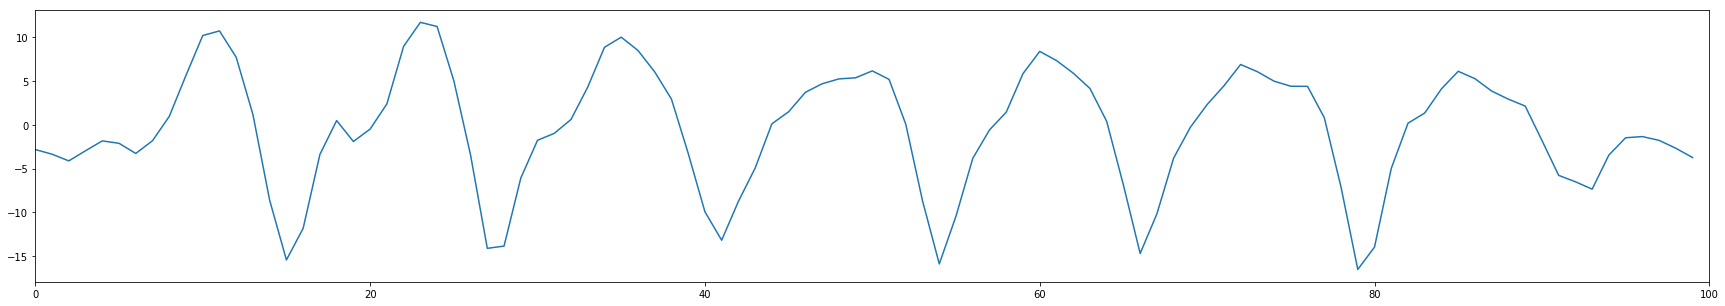

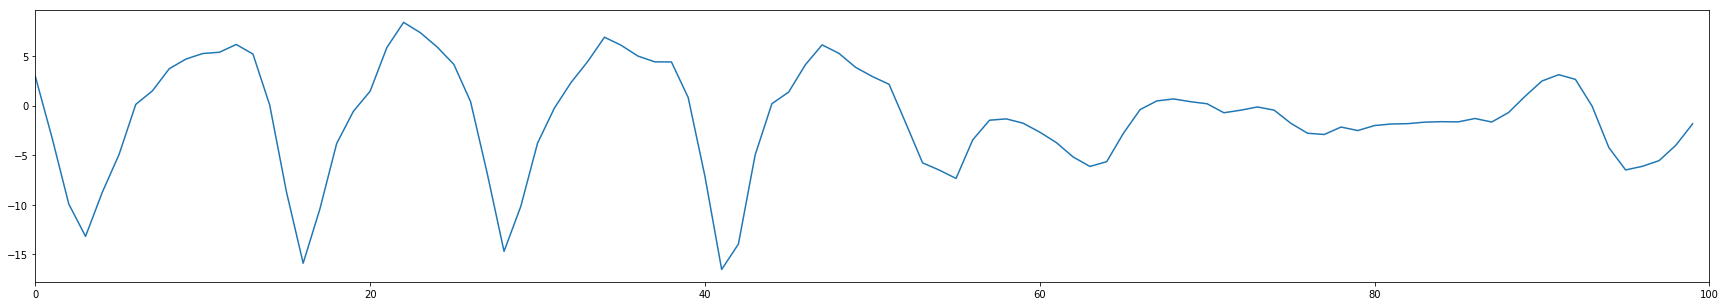

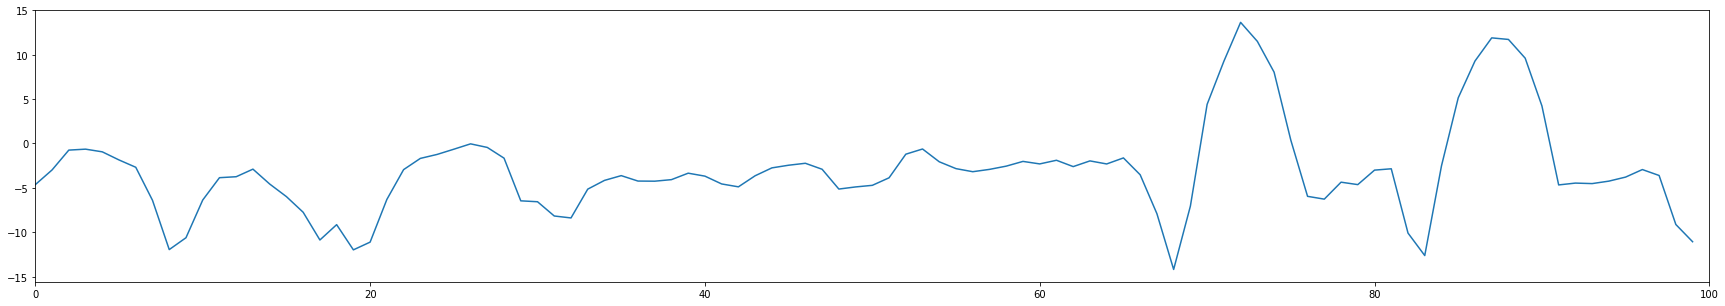

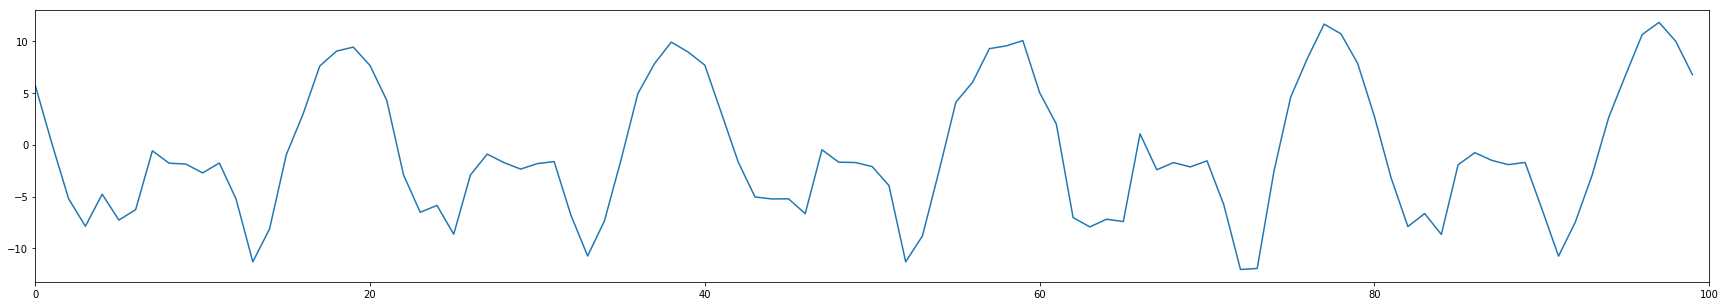

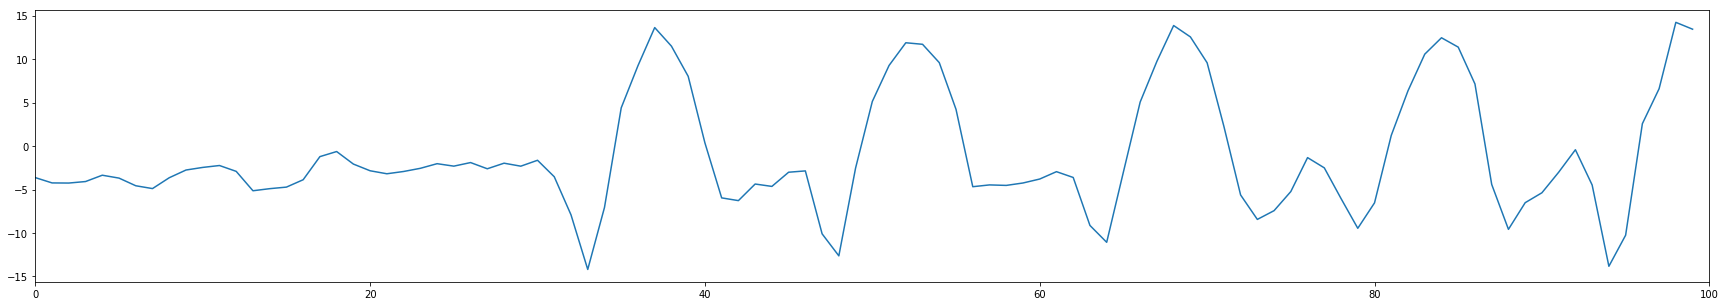

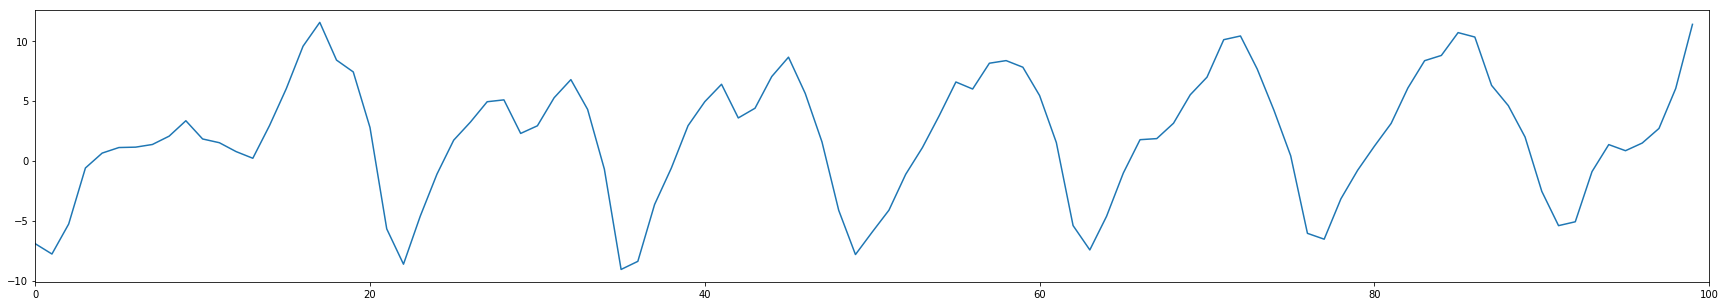

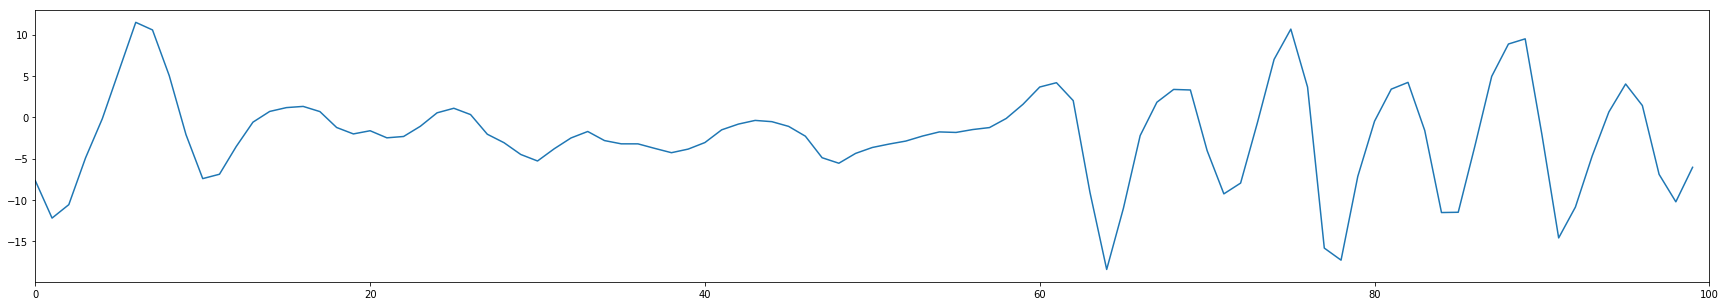

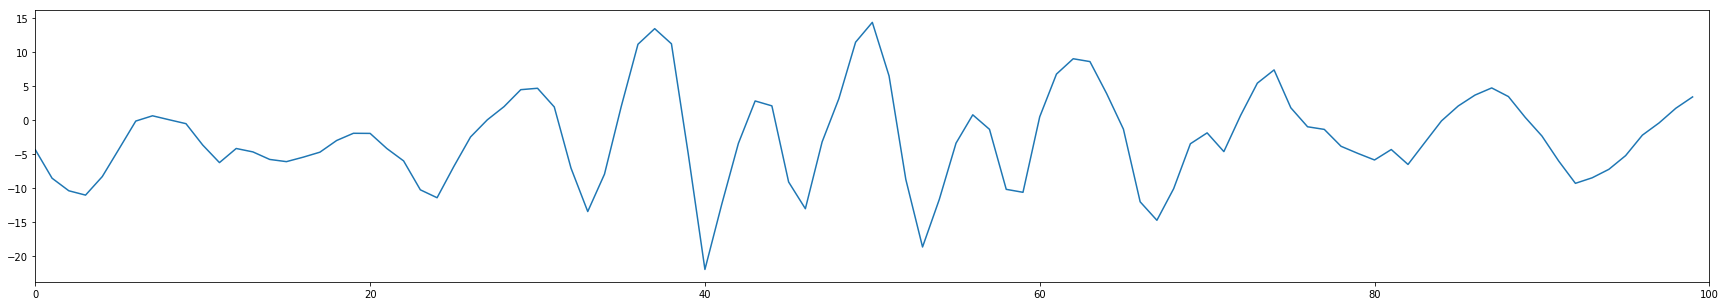

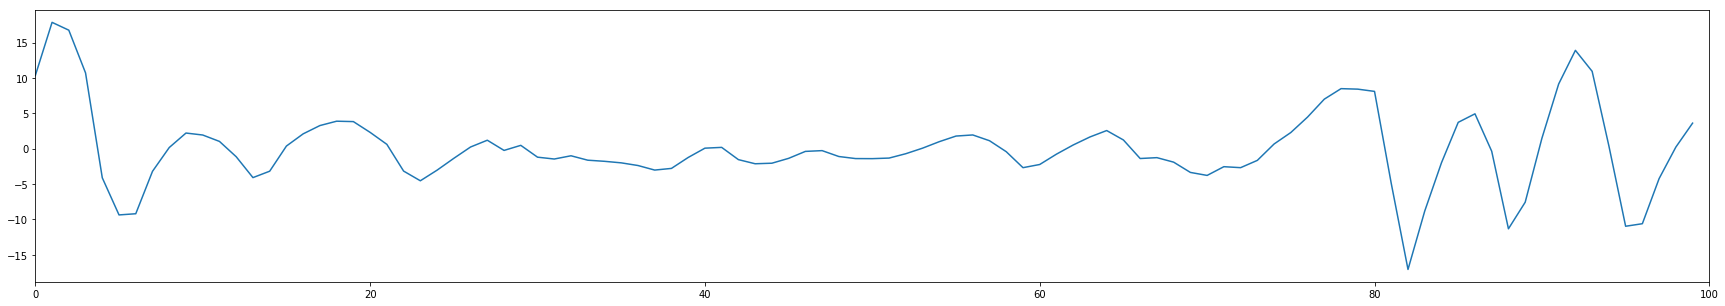

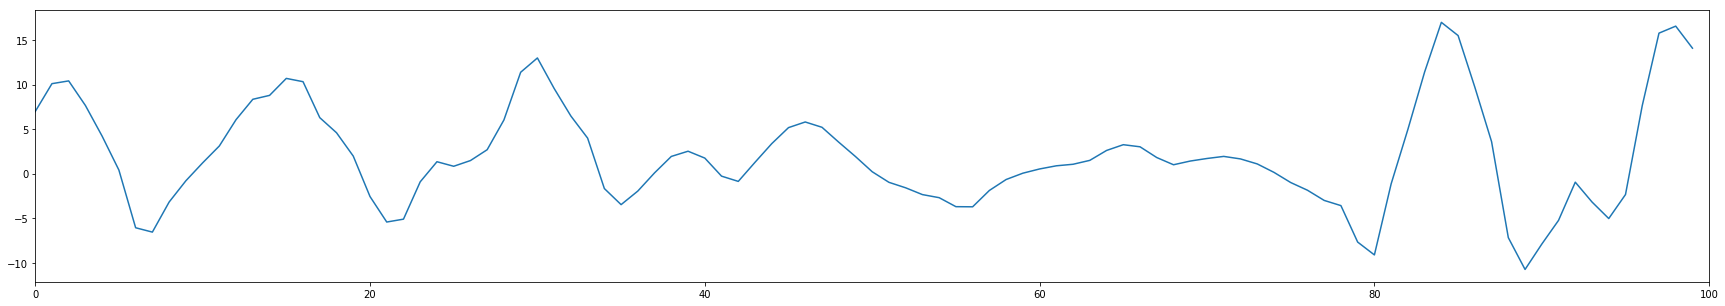

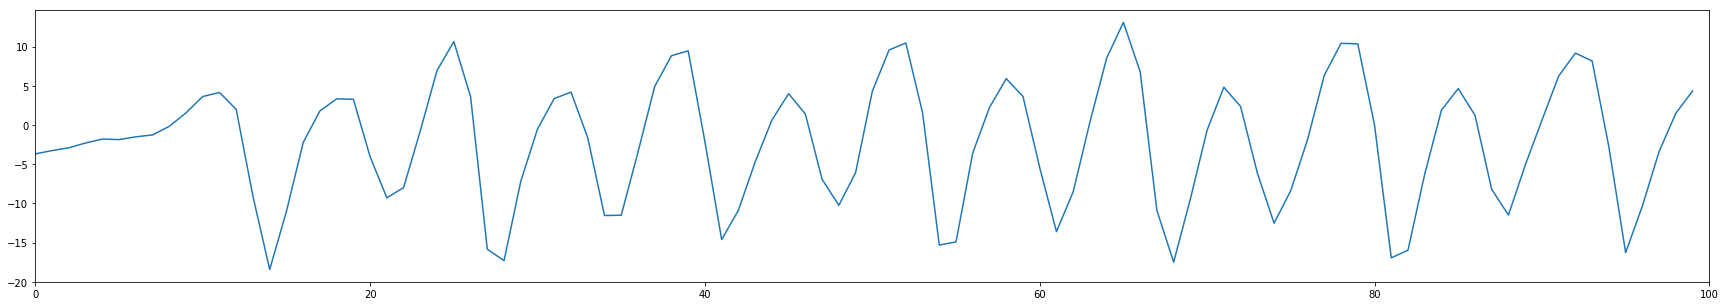

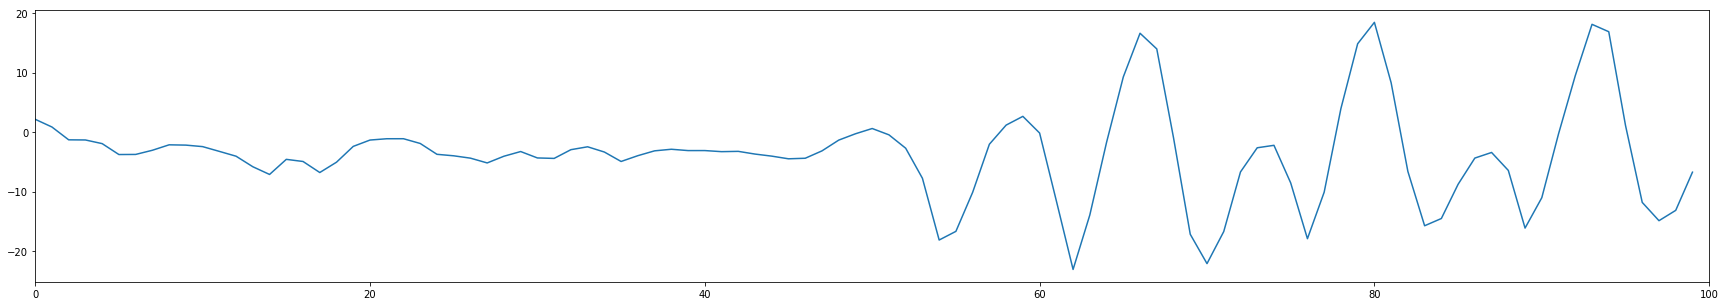

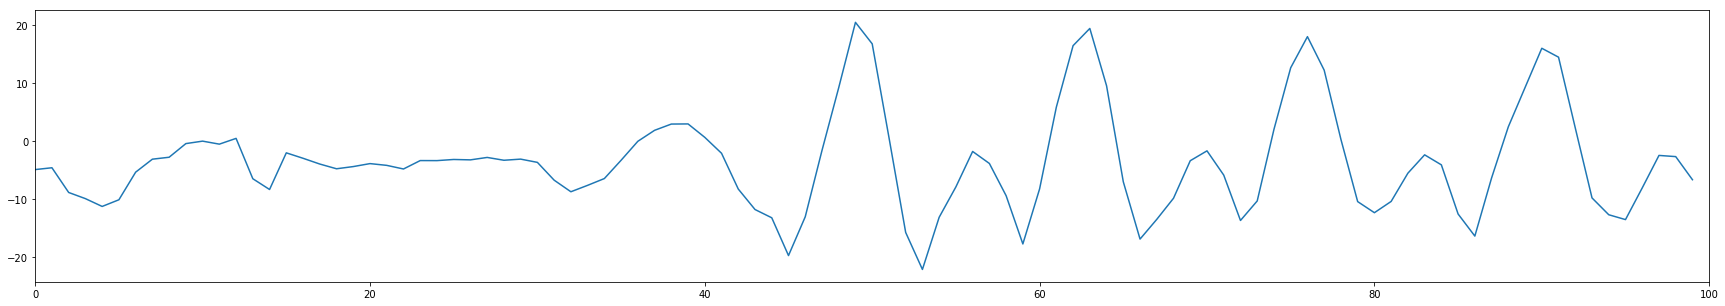

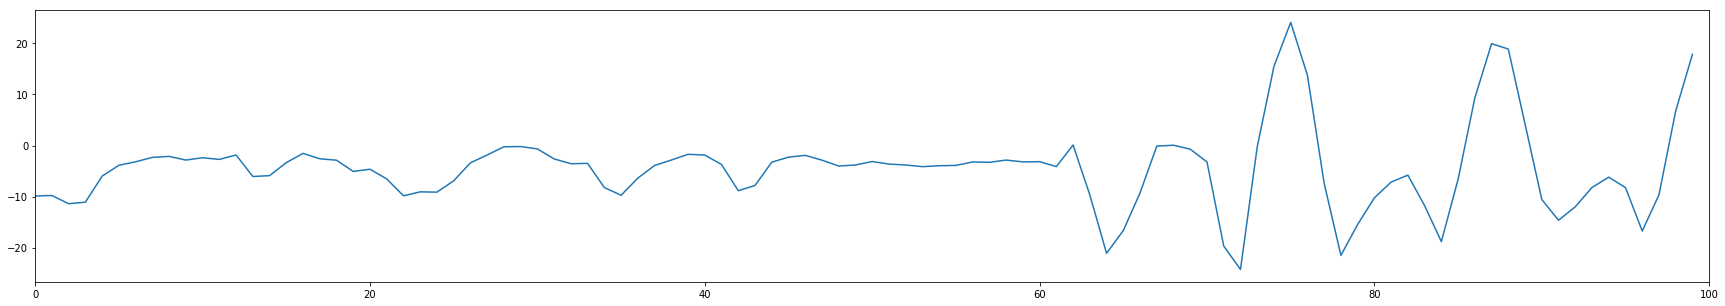

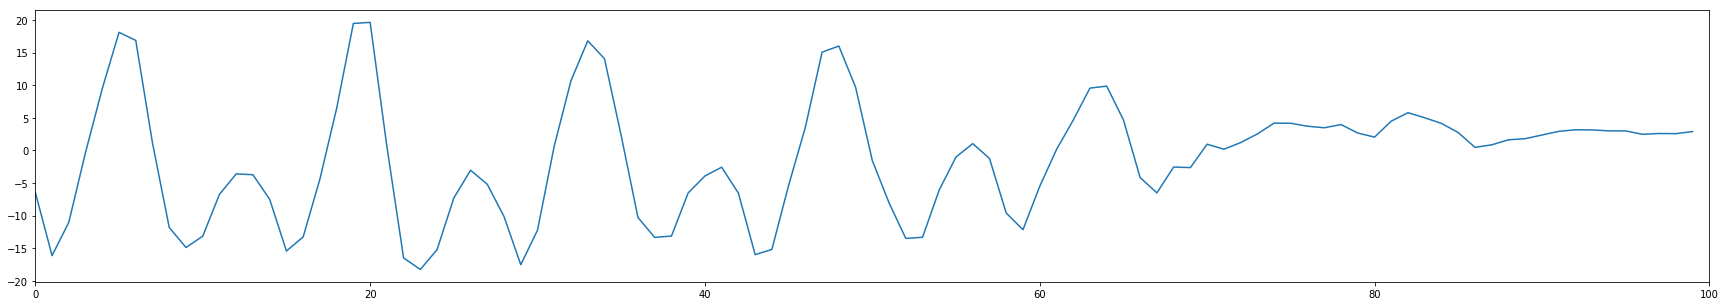

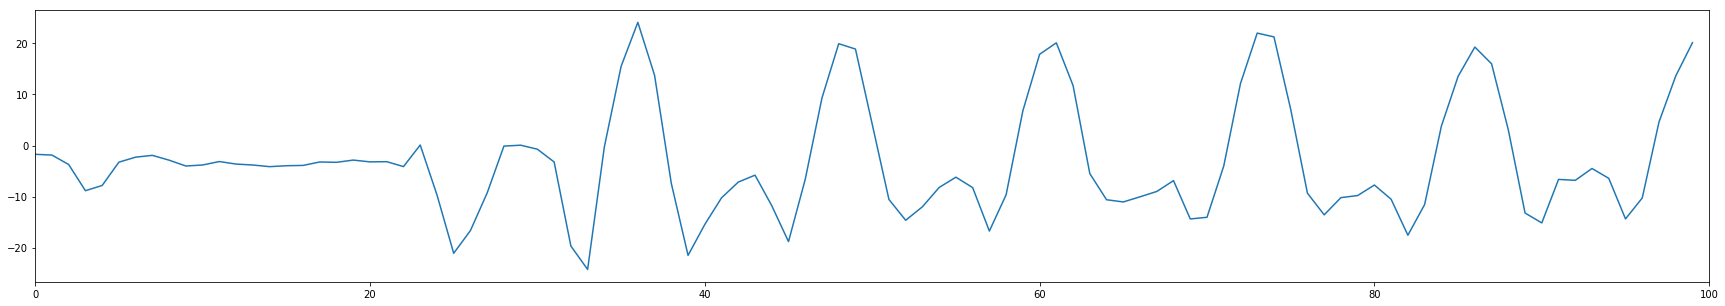

In [91]:
for x in range(0,len(motif_representatives)):
    plt.figure(figsize=(30,5))
    plt.xlim(0,100)
    plt.plot(motif_representatives.values[x,1:])

In [92]:
len(motif_representatives)

77

# ***********Comment out below *************

# Motif frequency calculation (by calculating the distance between the training acceleration and MRs)

In [166]:
from cdtw import pydtw 
discovered_motifs = []
window_size = len(motif_representatives.values[0])
disc_mot_list = [] 
dist = []
for rep in tqdm(motif_representatives.values):

    dist_row = []
    for z in range(0,len(acc)):

        candid = acc[z-window_size/2:z+window_size/2].values.reshape(-1)
        
        if z<window_size/2:
            candid = acc[0:z+window_size/2].values.reshape(-1)
            
        if z>len(acc)-window_size/2:
            candid = acc[z-window_size/2:len(acc)].values.reshape(-1)

        x = rep.tolist()
        y = candid
        #print len(candid)
        #euclidean_norm = lambda x, y: np.abs(x - y)
        #d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)
        #d = dtw.distance_fast(s1, s2)
        d = pydtw.dtw(x,y).get_dist()
        dist_row.extend([d])
        
    dist.append(dist_row)

    #print dist
    #break


100%|██████████| 77/77 [09:22<00:00,  7.42s/it]

In [167]:
norm_dist = []
for rows in dist:
    norm_dist.append(rows/np.array(rows).max())

In [168]:
disc_mot = []
for rows in norm_dist:
    disc_mot_row = []
    for elements in rows:
        if elements < 0.15:
            disc_mot_row.extend([1])
        else:
            disc_mot_row.extend([0])
    disc_mot.append(disc_mot_row)

In [169]:
len(disc_mot[0])

20003

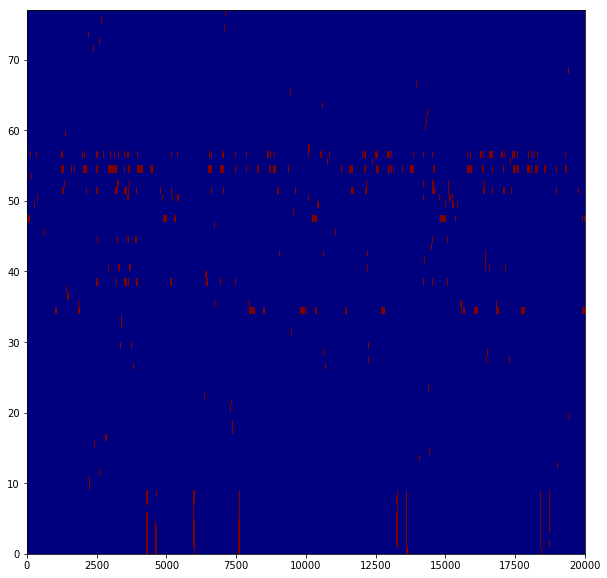

In [218]:
plt.figure(figsize=(10,10))
plt.imshow(disc_mot, cmap='jet', interpolation='nearest', origin='lower', extent=[0,len(dist[0]),0,len(motif_representatives.values)], aspect='auto')

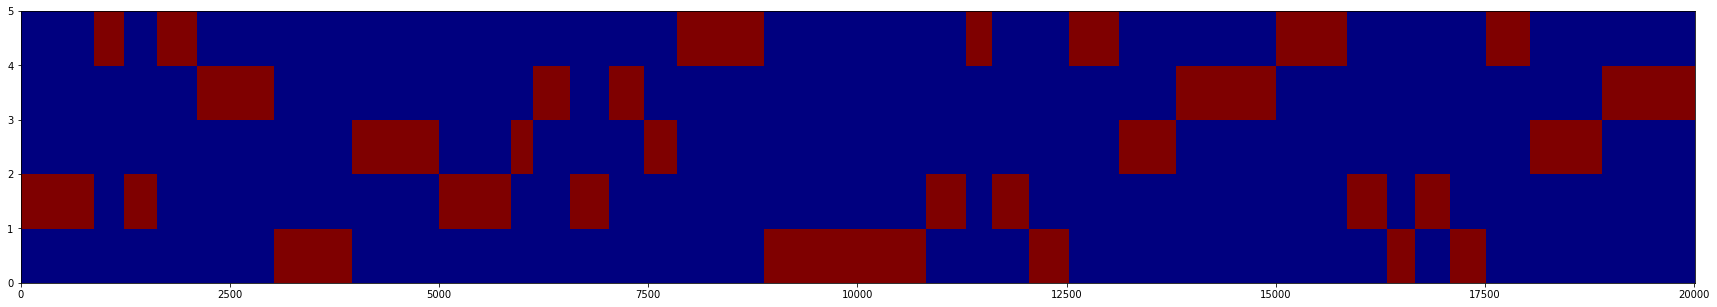

In [217]:
plt.figure(figsize=(30,5))
plt.imshow(place,cmap='jet', interpolation='nearest', origin='lower', extent=[0,len(location_list),0,len(place)], aspect='auto')
plt.show()

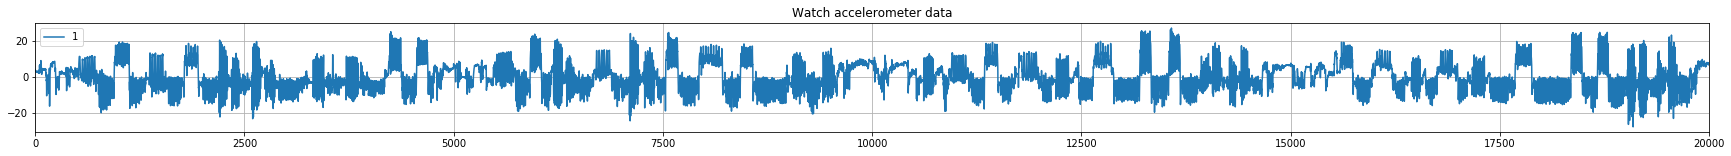

In [206]:
acc.plot(figsize = (30,2),title="Watch accelerometer data",grid=1,xlim=[0,len(acc)])

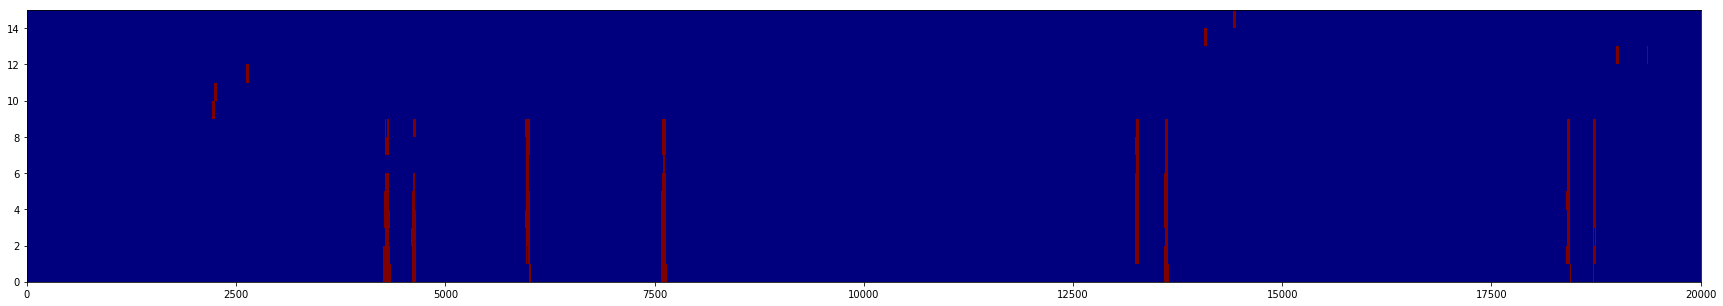

In [219]:
plt.figure(figsize=(30,5))
plt.imshow(disc_mot[0:15],cmap='jet', interpolation='nearest', origin='lower', extent=[0,len(location_list),0,len(disc_mot[0:15])], aspect='auto')
plt.show()

MR_id:  0


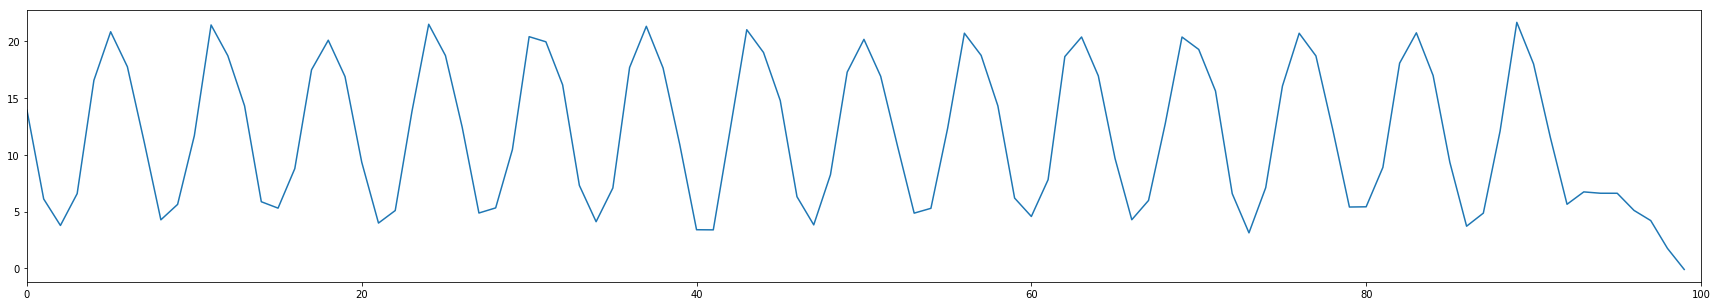

MR_id:  1


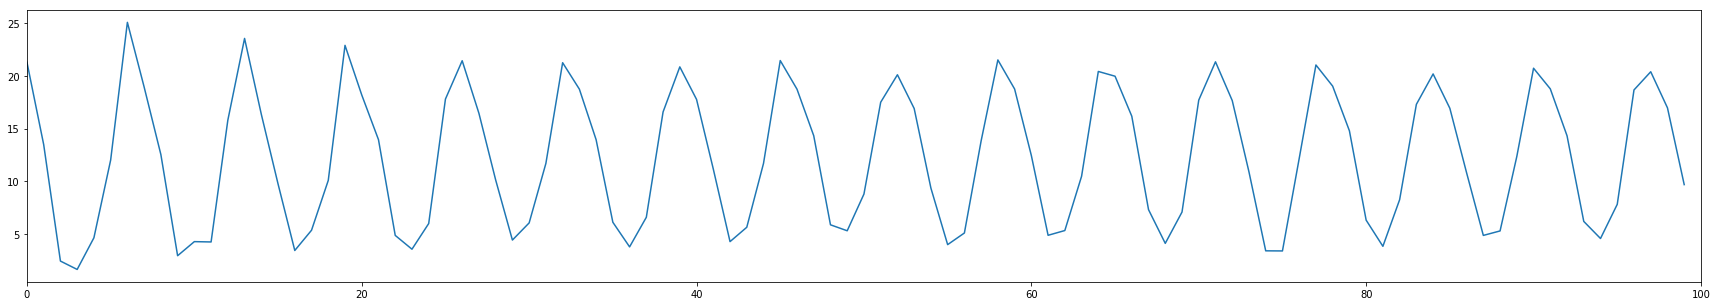

MR_id:  2


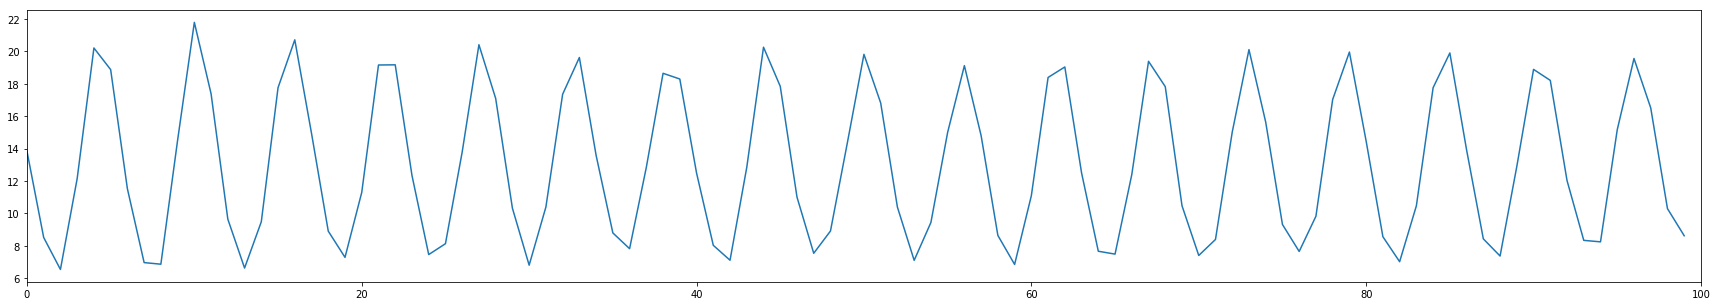

MR_id:  3


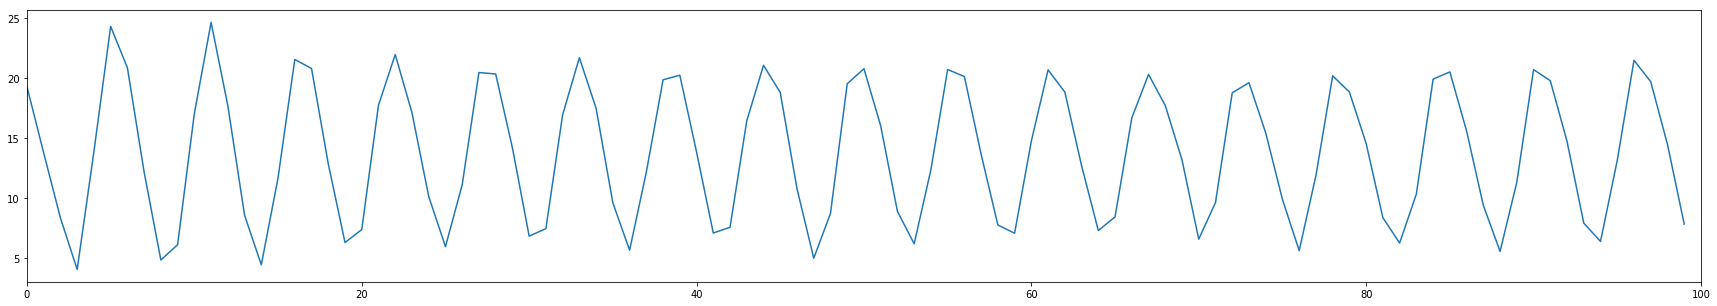

MR_id:  4


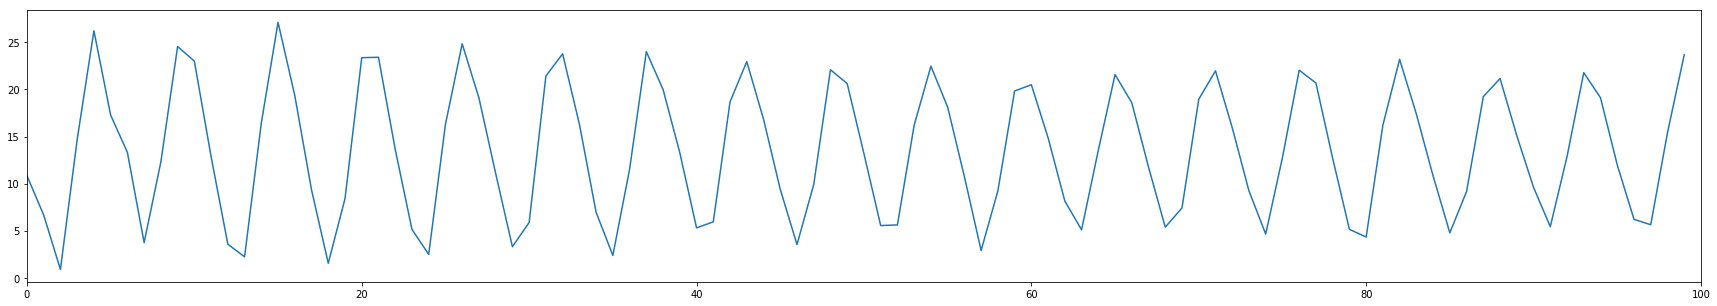

MR_id:  5


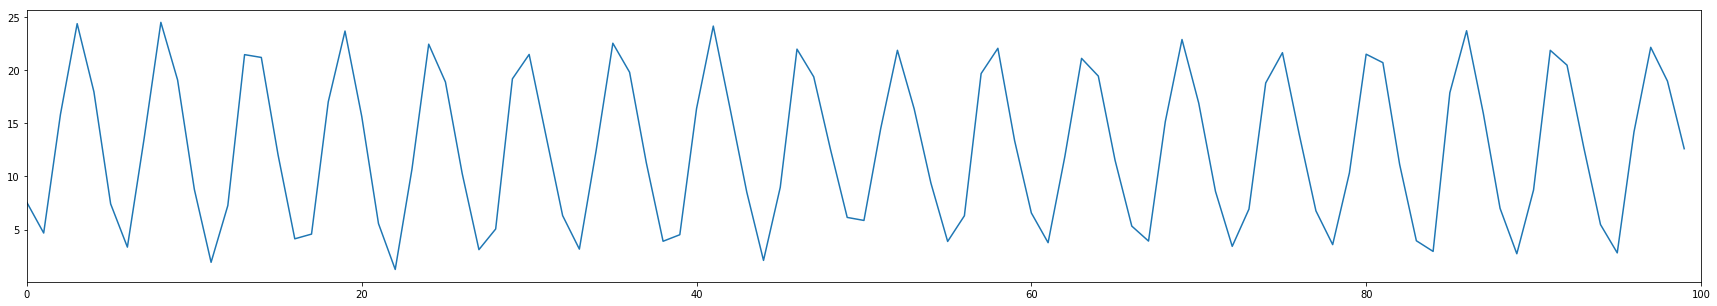

MR_id:  6


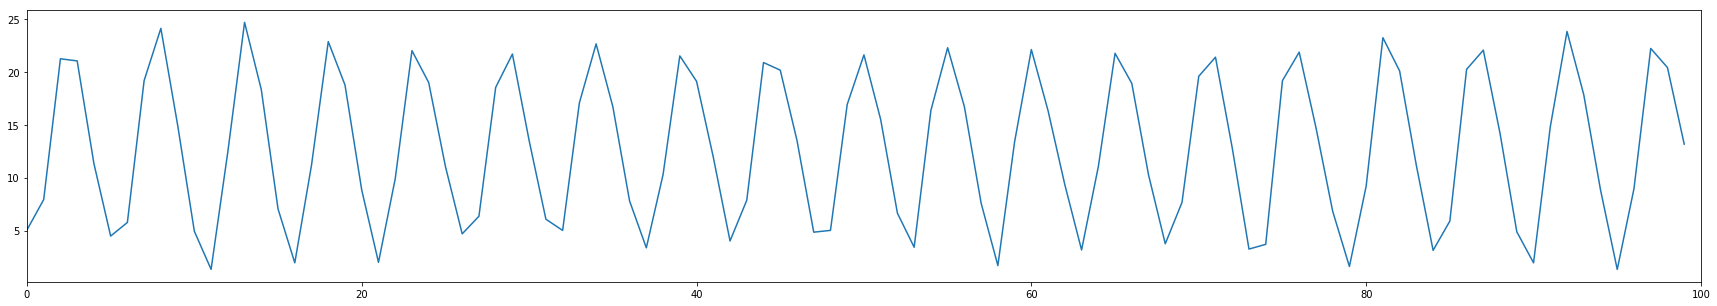

MR_id:  7


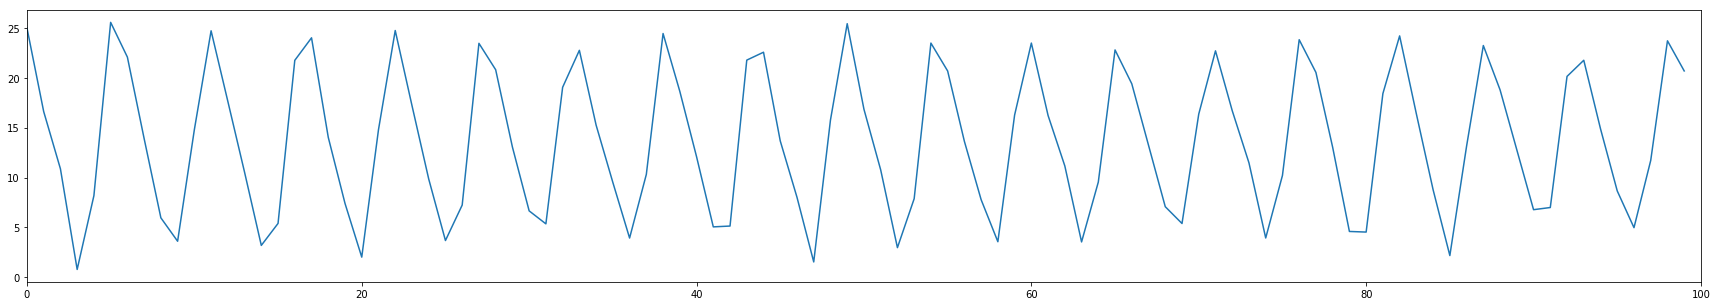

MR_id:  8


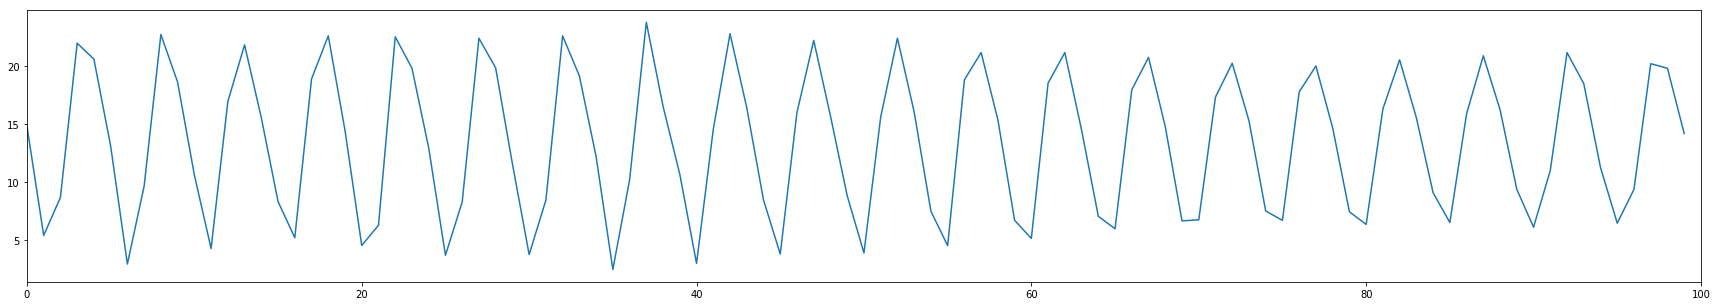

MR_id:  9


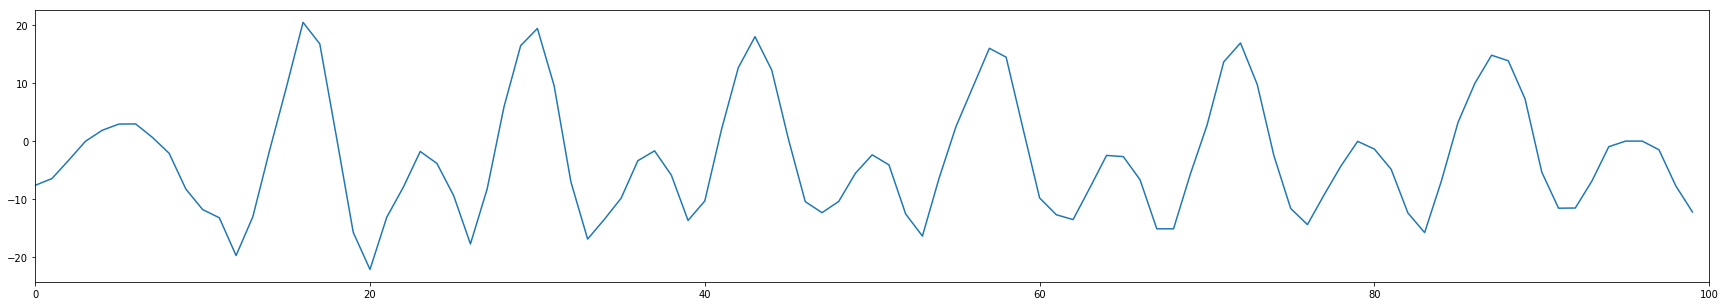

MR_id:  10


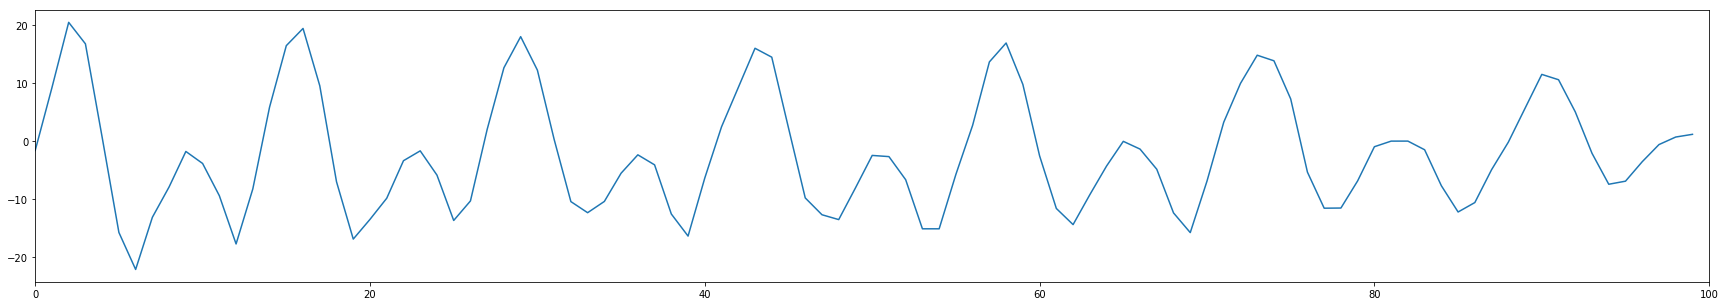

MR_id:  11


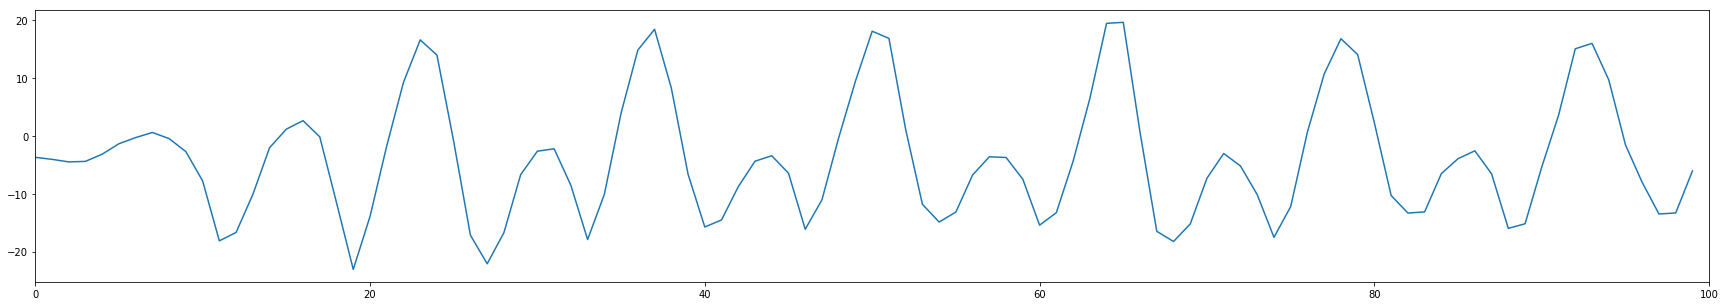

MR_id:  12


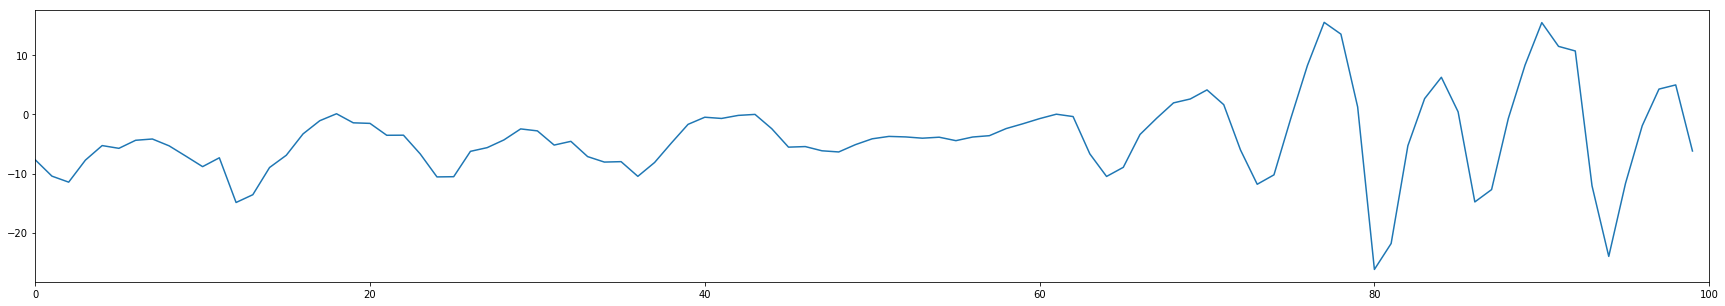

MR_id:  13


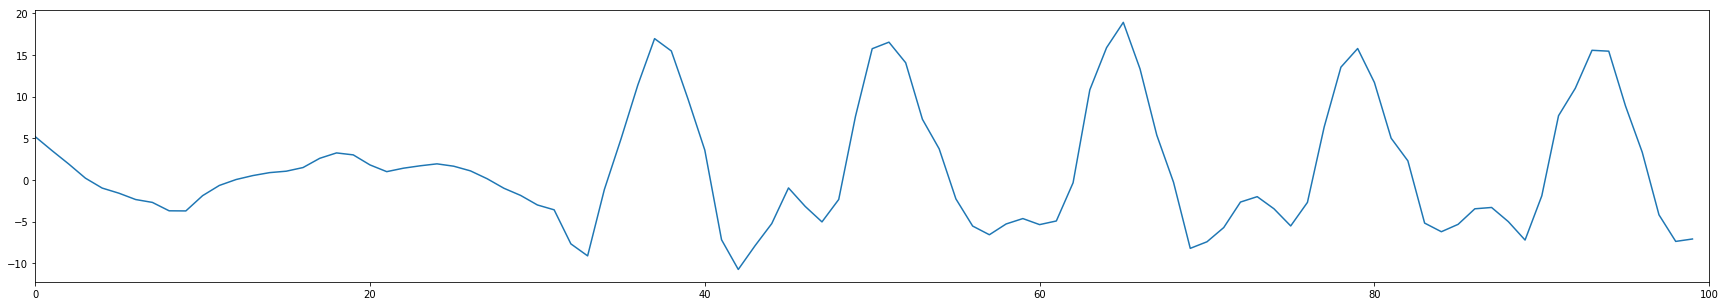

MR_id:  14


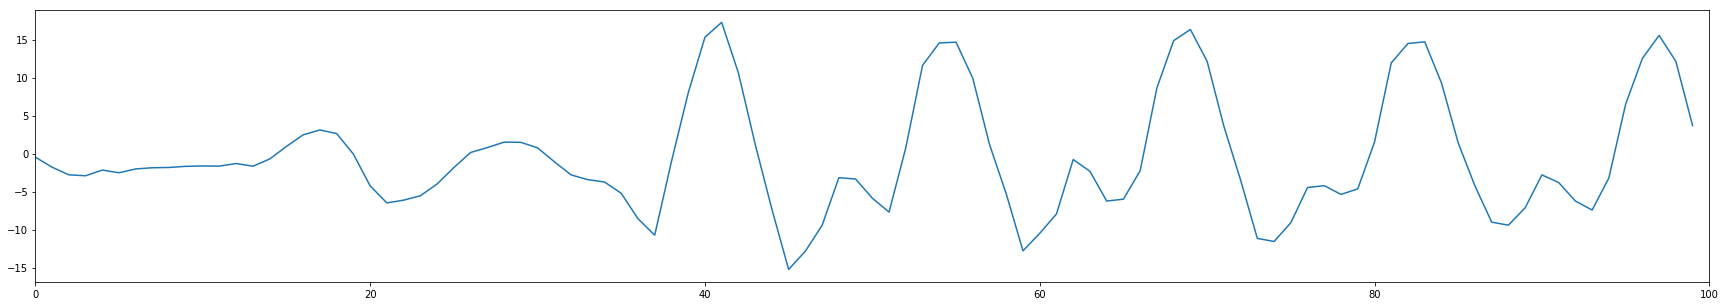

In [221]:
for x in range(0,15):    
    plt.figure(figsize=(30,5))
    plt.xlim(0,100)
    plt.plot(motif_representatives.values[x,1:])   
    print "MR_id: ", x
    plt.show()

In [ ]:
np.where(location_list.values==2)[0]

In [ ]:
ax = df1.plot()
df2.plot(ax=ax)

location_list

In [205]:
np.where(location_list.values==2)[0]

(3232,)

In [172]:
place_cluster = location_list
place_cluster = place_cluster.values.reshape(-1).tolist()
places = set(place_cluster)

place = []
for p in tqdm(places):
    loc = []
    for c in place_cluster:
        if p == c:
            loc.append(1)
        else:
            loc.append(0)
    place.append(loc)
            

print places


100%|██████████| 5/5 [00:00<00:00, 259.48it/s]

set([0, 1, 2, 3, 4])


In [175]:
acc

1
0      4.153605
1      3.889403
2      3.697325
3      3.399065
4      3.426182
5      3.317291
6      3.060173
7      3.304810
8      3.127418
9      3.051782
10     2.989814
11     3.000736
12     3.002801
13     3.171703
14     3.068140
15     2.928619
16     2.773923
17     2.739291
18     2.820464
19     2.786500
20     2.762202
21     2.810502
22     2.675120
23     2.858403
24     2.852674
25     2.877527
26     2.856010
27     3.072524
28     3.067331
29     2.983975
...         ...
19973  7.633321
19974  7.650408
19975  7.409011
19976  7.257383
19977  8.086709
19978  7.689932
19979  7.096376
19980  6.982957
19981  7.276780
19982  7.097748
19983  7.400450
19984  7.288375
19985  7.146086
19986  7.141436
19987  7.485314
19988  7.433238
19989  7.202907
19990  6.866378
19991  6.858965
19992  7.183738
19993  7.470278
19994  7.409782
19995  7.474928
19996  7.445269
19997  7.778416
19998  7.629545
19999  7.772129
20000  7.495267
20001  7.846593
20002  6.756504

[20003 rows x 1 columns]

In [176]:
len(disc_mot[0])

20003

In [177]:
feat = []
mot_sum = 0
for location in range(0,len(place)):
    for row in range(0,len(disc_mot)):
        count = 0
        for element in range(0,len(place[location])):
            if place[location][element] == 1:
                if disc_mot[row][element] == 1:
                    count = count+1
        feat.append([location,row,count])

In [178]:
feature_list = []
for f in feat:

    feature_list.append([f[0],f[1],float(f[2])])
#feature_list.append(ft)

In [179]:
feature_list = pd.DataFrame(feature_list)

In [180]:
feature_list

0   1      2
0    0   0    0.0
1    0   1    0.0
2    0   2    0.0
3    0   3    0.0
4    0   4    0.0
5    0   5    0.0
6    0   6    0.0
7    0   7    0.0
8    0   8    0.0
9    0   9    0.0
10   0  10    0.0
11   0  11    0.0
12   0  12    0.0
13   0  13    0.0
14   0  14    0.0
15   0  15    0.0
16   0  16    0.0
17   0  17    0.0
18   0  18    0.0
19   0  19    0.0
20   0  20    0.0
21   0  21    0.0
22   0  22    0.0
23   0  23    0.0
24   0  24    0.0
25   0  25    0.0
26   0  26   92.0
27   0  27  125.0
28   0  28   46.0
29   0  29  176.0
..  ..  ..    ...
355  4  47   59.0
356  4  48    0.0
357  4  49  111.0
358  4  50  128.0
359  4  51  207.0
360  4  52   32.0
361  4  53    0.0
362  4  54  951.0
363  4  55    0.0
364  4  56  493.0
365  4  57    0.0
366  4  58    0.0
367  4  59    0.0
368  4  60    0.0
369  4  61    0.0
370  4  62    0.0
371  4  63    0.0
372  4  64    0.0
373  4  65    0.0
374  4  66    0.0
375  4  67    0.0
376  4  68    0.0
377  4  69    0.0
378  4  70    0.0
379  4  71    0.0
380  4  72    0.0
381  4  73    0.0
382  4  74    0.0
383  4  75    0.0
384  4  76    0.0

[385 rows x 3 columns]

In [181]:
env_wise_sum = []
for locs in set(feature_list[0]):
    print locs
    print feature_list[feature_list[0]==locs][2].sum()
    env_wise_sum.append([locs,feature_list[feature_list[0]==locs][2].sum()])

env_wise_sum

test = []
for sums in env_wise_sum:
    print sums
    test.append(list(feature_list[feature_list[0]==sums[0]][2]/sums[1]))

feature_list['3'] = np.array(test).reshape(-1)

feature_list.drop(feature_list.columns[2], axis=1, inplace=True)

0
4264.0
1
2770.0
2
4482.0
3
3419.0
4
3072.0
[0, 4264.0]
[1, 2770.0]
[2, 4482.0]
[3, 3419.0]
[4, 3072.0]


In [182]:
env_wise_sum

[[0, 4264.0], [1, 2770.0], [2, 4482.0], [3, 3419.0], [4, 3072.0]]

In [183]:
feature_list

0   1         3
0    0   0  0.000000
1    0   1  0.000000
2    0   2  0.000000
3    0   3  0.000000
4    0   4  0.000000
5    0   5  0.000000
6    0   6  0.000000
7    0   7  0.000000
8    0   8  0.000000
9    0   9  0.000000
10   0  10  0.000000
11   0  11  0.000000
12   0  12  0.000000
13   0  13  0.000000
14   0  14  0.000000
15   0  15  0.000000
16   0  16  0.000000
17   0  17  0.000000
18   0  18  0.000000
19   0  19  0.000000
20   0  20  0.000000
21   0  21  0.000000
22   0  22  0.000000
23   0  23  0.000000
24   0  24  0.000000
25   0  25  0.000000
26   0  26  0.021576
27   0  27  0.029315
28   0  28  0.010788
29   0  29  0.041276
..  ..  ..       ...
355  4  47  0.019206
356  4  48  0.000000
357  4  49  0.036133
358  4  50  0.041667
359  4  51  0.067383
360  4  52  0.010417
361  4  53  0.000000
362  4  54  0.309570
363  4  55  0.000000
364  4  56  0.160482
365  4  57  0.000000
366  4  58  0.000000
367  4  59  0.000000
368  4  60  0.000000
369  4  61  0.000000
370  4  62  0.000000
371  4  63  0.000000
372  4  64  0.000000
373  4  65  0.000000
374  4  66  0.000000
375  4  67  0.000000
376  4  68  0.000000
377  4  69  0.000000
378  4  70  0.000000
379  4  71  0.000000
380  4  72  0.000000
381  4  73  0.000000
382  4  74  0.000000
383  4  75  0.000000
384  4  76  0.000000

[385 rows x 3 columns]

In [184]:
feature_list.to_csv(train_root + "features", header=False, index=False)

# Motif frequency calculation

place_times_cluster = np.vstack((list(np.hstack(location_list.values)), list(clusters))).T

place_times_cluster

len(place_times_cluster)

env_mot_list = []

for env in set((list(np.hstack(location_list.values)))):
    #print env
    pmcombo = place_times_cluster[place_times_cluster[:,0]==env]
    mot_list = []
    for motif in set(list(clusters)):#set(pmcombo[:,1]):
        envmot = pmcombo[:,1]
        #print int(motif), envmot.tolist().count(motif)
        mot_list.append([int(motif), envmot.tolist().count(motif)])
        
    env_mot_list.append([int(env),mot_list])    
    #for motif in set(times_cluster):
     #   print no, times_cluster.count(no)

env_mot_list

motif_occur = []
for no in set(list(clusters)):
    if no != 0:
        motif_occur.append([no, list(clusters).count(no)])

motif_occur = []
for mot_type in set(clusters):
    motif_occur.append([mot_type,clusters.tolist().count(mot_type)])

motif_occur

mot_sum = pd.DataFrame(motif_occur)[1].sum()

mot_sum

mot_ratio = []
for mots in motif_occur:
    mot_ratio.append([mots[0],float(mots[1])])#/float(mot_sum)])

feature_list = []
for x in range(0,len(env_mot_list)):
    for y in range(0,len(env_mot_list[x][1])):
        feature_list.append([x,y,float(env_mot_list[x][1][y][1])])#/mot_sum])

feature_list = pd.DataFrame(feature_list)

feature_list[feature_list[0]==0][2].sum()

env_wise_sum = []
for locs in set(feature_list[0]):
    print locs
    print feature_list[feature_list[0]==locs][2].sum()
    env_wise_sum.append([locs,feature_list[feature_list[0]==locs][2].sum()])

env_wise_sum

test = []
for sums in env_wise_sum:
    print sums
    test.append(list(feature_list[feature_list[0]==sums[0]][2]/sums[1]))

feature_list['3'] = np.array(test).reshape(-1)

feature_list.drop(feature_list.columns[2], axis=1,inplace=True)

len(np.array(test).reshape(-1))

len(test)

feature_list

feature_list

feature_list.to_csv(train_root + "features", header=False, index=False)

pd.DataFrame(mot_ratio).sum(axis=0)

mot_ratio = pd.DataFrame(mot_ratio)

mot_ratio

mot_ratio.values

mot_ratio.to_csv(train_root + "features", header=False, index=False)